<a href="https://colab.research.google.com/github/maiaclem/Private-V-Public/blob/main/Team_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import statsmodels.formula.api as sm
from scipy.stats import f_oneway


pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
adult21=pd.read_csv('/content/drive/MyDrive/DS4A - Team 31 Files/adult21_EDA/adult21.csv')

In [ ]:
#importing adult 20
adult20= pd.read_csv('/content/drive/MyDrive/DS4A - Team 31 Files/df2.csv')

In [ ]:
#importing adult 20 renamed
adult20_2=pd.read_csv('/content/drive/MyDrive/DS4A - Team 31 Files/newdf2.csv')

In [ ]:
#importing adult 19
adult191=pd.read_csv('/content/drive/MyDrive/DS4A - Team 31 Files/adult19NEW.csv')

In [ ]:
#importing adult 19
adult19=pd.read_csv('/content/drive/MyDrive/DS4A - Team 31 Files/adult19NEW2.csv')

# Data Curation

In [ ]:
adult21['HICOV_A']

0        1
1        1
2        1
3        1
4        1
        ..
29477    1
29478    1
29479    1
29480    1
29481    1
Name: HICOV_A, Length: 29482, dtype: int64

In [ ]:
adult21.columns

Index(['URBRRL', 'RATCAT_A', 'IMPINCFLG_A', 'CVDVAC2YR_A', 'CVDVAC2MR_A',
       'CVDVAC1YR_A', 'CVDVAC1MR_A', 'SHTCVD19AV_A', 'SHTCVD19NM_A',
       'SHTCVD19_A',
       ...
       'PROXYREL_A', 'PROXY_A', 'AVAIL_A', 'HHSTAT_A', 'INTV_MON', 'RECTYPE',
       'IMPNUM_A', 'WTFA_A', 'HHX', 'POVRATTC_A'],
      dtype='object', length=622)

622 columns. Oh my. We went through the columns and decided to pick out the ones that made the most sense for what we are trying to analyze. 

In [ ]:
adult21.isna().sum()

URBRRL             0
RATCAT_A           0
IMPINCFLG_A        0
CVDVAC2YR_A    15201
CVDVAC2MR_A    15189
               ...  
RECTYPE            0
IMPNUM_A           0
WTFA_A             0
HHX                0
POVRATTC_A         0
Length: 622, dtype: int64

In [ ]:
df=pd.DataFrame(adult21,columns=['AGEP_A','AGE65','SEX_A','EDUCP_A','HISP_A','PAYBLL12M_A','RACEALLP_A','LASTDR_A', 'WELLNESS_A', 'WELLVIS_A','USUALPL_A', 'USPLKIND_A', 'URGNT12MTC_A', 'EMERG12MTC_A', 'HOSPONGT_A', 'MEDDL12M_A','PHSTAT_A','COVER_A','COVER65_A','NOTCOV_A','HIKIND01_A','HIKIND02_A','HIKIND03_A','HIKIND04_A','HIKIND05_A','HIKIND06_A','HIKIND07_A','HIKIND08_A','HIKIND09_A','HIKIND10_A','DLYCARE_A','DNGCARE_A','RX12M_A','RXSK12M_A','RXLS12M_A','RXDL12M_A','RXDG12M_A','ANXFREQ_A ','ANXLEVEL_A','DEPFREQ_A ','DEPLEVEL_A','EMPHEALINS_A','POVRATTC_A','EMDWRKCAT1_A','INCWRKO_A','INCINTER_A','INCSSRR_A ','INCSSISSDI_A','SSISSDIBTH_A','INCWELF_A','INCRETIRE_A','INCOTHR_A','RATCAT_A','FSNAP12M_A','FWIC12M_A','FDSBALANCE_A','DIBEV_A','INSSKIP12M_A ','INSLESS12M_A','INSDLY12M_A','HYPEV_A','CANEV_A','COPDEV_A','CHDEV_A'])

In [ ]:
# Count columns with NA
for col in df.columns:
    print("{0} has {1} rows with NA".format(col, df[col].isnull().values.ravel().sum()))

AGEP_A has 0 rows with NA
AGE65 has 29329 rows with NA
SEX_A has 0 rows with NA
EDUCP_A has 0 rows with NA
HISP_A has 0 rows with NA
PAYBLL12M_A has 0 rows with NA
RACEALLP_A has 0 rows with NA
LASTDR_A has 0 rows with NA
WELLNESS_A has 322 rows with NA
WELLVIS_A has 23652 rows with NA
USUALPL_A has 0 rows with NA
USPLKIND_A has 2795 rows with NA
URGNT12MTC_A has 0 rows with NA
EMERG12MTC_A has 0 rows with NA
HOSPONGT_A has 0 rows with NA
MEDDL12M_A has 0 rows with NA
PHSTAT_A has 0 rows with NA
COVER_A has 8908 rows with NA
COVER65_A has 20575 rows with NA
NOTCOV_A has 0 rows with NA
HIKIND01_A has 0 rows with NA
HIKIND02_A has 0 rows with NA
HIKIND03_A has 0 rows with NA
HIKIND04_A has 0 rows with NA
HIKIND05_A has 0 rows with NA
HIKIND06_A has 0 rows with NA
HIKIND07_A has 0 rows with NA
HIKIND08_A has 0 rows with NA
HIKIND09_A has 0 rows with NA
HIKIND10_A has 0 rows with NA
DLYCARE_A has 0 rows with NA
DNGCARE_A has 0 rows with NA
RX12M_A has 0 rows with NA
RXSK12M_A has 9230 rows

In [ ]:
adult21['COVER_A'].isna().sum()

8908

In [ ]:
# Count total NaN in a DataFrame
print(" \nCount total NaN in a DataFrame : \n\n",
       df.isnull().sum().sum())

 
Count total NaN in a DataFrame : 

 382604


So here we had to decided whether what we wanted to do with the NaN values. We can either add them to the variable "5" that means 'don't know' or make the NaN values a complete new variable. 

In [ ]:
#rows and columns in the new dataframe
df.shape

(29482, 64)

In [ ]:
df.columns

Index(['AGEP_A', 'AGE65', 'SEX_A', 'EDUCP_A', 'HISP_A', 'PAYBLL12M_A',
       'RACEALLP_A', 'LASTDR_A', 'WELLNESS_A', 'WELLVIS_A', 'USUALPL_A',
       'USPLKIND_A', 'URGNT12MTC_A', 'EMERG12MTC_A', 'HOSPONGT_A',
       'MEDDL12M_A', 'PHSTAT_A', 'COVER_A', 'COVER65_A', 'NOTCOV_A',
       'HIKIND01_A', 'HIKIND02_A', 'HIKIND03_A', 'HIKIND04_A', 'HIKIND05_A',
       'HIKIND06_A', 'HIKIND07_A', 'HIKIND08_A', 'HIKIND09_A', 'HIKIND10_A',
       'DLYCARE_A', 'DNGCARE_A', 'RX12M_A', 'RXSK12M_A', 'RXLS12M_A',
       'RXDL12M_A', 'RXDG12M_A', 'ANXFREQ_A ', 'ANXLEVEL_A', 'DEPFREQ_A ',
       'DEPLEVEL_A', 'EMPHEALINS_A', 'POVRATTC_A', 'EMDWRKCAT1_A', 'INCWRKO_A',
       'INCINTER_A', 'INCSSRR_A ', 'INCSSISSDI_A', 'SSISSDIBTH_A', 'INCWELF_A',
       'INCRETIRE_A', 'INCOTHR_A', 'RATCAT_A', 'FSNAP12M_A', 'FWIC12M_A',
       'FDSBALANCE_A', 'DIBEV_A', 'INSSKIP12M_A ', 'INSLESS12M_A',
       'INSDLY12M_A', 'HYPEV_A', 'CANEV_A', 'COPDEV_A', 'CHDEV_A'],
      dtype='object')

In [ ]:
df.describe()

,AGEP_A,AGE65,SEX_A,EDUCP_A,HISP_A,PAYBLL12M_A,RACEALLP_A,LASTDR_A,WELLNESS_A,WELLVIS_A,USUALPL_A,USPLKIND_A,URGNT12MTC_A,EMERG12MTC_A,HOSPONGT_A,MEDDL12M_A,PHSTAT_A,COVER_A,COVER65_A,NOTCOV_A,HIKIND01_A,HIKIND02_A,HIKIND03_A,HIKIND04_A,HIKIND05_A,HIKIND06_A,HIKIND07_A,HIKIND08_A,HIKIND09_A,HIKIND10_A,DLYCARE_A,DNGCARE_A,RX12M_A,RXSK12M_A,RXLS12M_A,RXDL12M_A,RXDG12M_A,ANXFREQ_A,ANXLEVEL_A,DEPFREQ_A,DEPLEVEL_A,EMPHEALINS_A,POVRATTC_A,EMDWRKCAT1_A,INCWRKO_A,INCINTER_A,INCSSRR_A,INCSSISSDI_A,SSISSDIBTH_A,INCWELF_A,INCRETIRE_A,INCOTHR_A,RATCAT_A,FSNAP12M_A,FWIC12M_A,FDSBALANCE_A,DIBEV_A,INSSKIP12M_A,INSLESS12M_A,INSDLY12M_A,HYPEV_A,CANEV_A,COPDEV_A,CHDEV_A
count,29482.000000,153.000000,29482.000000,29482.000000,29482.000000,29482.000000,29482.000000,29482.000000,29160.000000,5830.000000,29482.000000,26687.000000,29482.000000,29482.000000,29482.000000,29482.000000,29482.000000,20574.000000,8907.000000,29482.000000,29482.000000,29482.000000,29482.000000,29482.000000,29482.000000,29482.000000,29482.000000,29482.000000,29482.000000,29482.000000,29482.000000,29482.000000,29482.000000,20252.000000,20252.000000,20252.000000,29482.000000,0.0,20624.000000,0.0,14004.000000,18091.000000,29482.000000,18091.000000,29482.000000,29482.000000,0.0,28262.000000,2405.000000,28262.000000,28262.000000,28262.000000,29482.000000,29482.000000,14108.000000,29482.000000,29482.000000,0.0,1004.000000,1004.000000,29482.000000,29482.000000,29482.000000,29482.000000
mean,52.626959,1.450980,1.546639,6.447154,1.861577,1.937725,1.722136,1.345804,1.218347,2.135678,1.173496,1.200022,0.526457,0.346347,1.961265,1.978733,2.389729,1.581511,2.478949,1.944576,1.454175,1.723357,1.942779,1.918255,2.021471,1.977240,2.018045,1.994234,2.009667,1.945967,1.850587,1.926803,1.366427,1.965287,1.959658,1.950820,2.008514,NaN,1.932845,NaN,1.927378,1.336410,4.245687,1.893538,1.557187,2.061326,NaN,1.972047,2.014553,2.010120,1.844243,1.897919,9.847873,2.140933,2.195988,3.115189,1.899600,NaN,1.899402,1.882470,1.647955,1.881589,1.950885,1.955566
std,18.484035,1.006173,0.500750,7.047389,0.345350,0.556001,1.701811,1.036191,0.560628,1.715064,0.698785,0.702942,1.191536,0.992944,0.615698,0.590900,1.065508,1.025434,1.362815,0.486424,0.637801,0.599167,0.461336,0.483681,0.370067,0.425587,0.374848,0.405728,0.386162,0.458254,0.686870,0.656344,0.776606,0.221170,0.238512,0.254825,0.611138,NaN,1.091196,NaN,1.135947,0.682588,2.993698,1.576937,1.427963,1.561588,NaN,0.658750,1.464853,0.527141,0.713876,0.638361,4.011807,1.263701,1.214007,1.049322,0.362539,NaN,0.300945,0.322211,0.541958,0.376618,0.322535,0.408094
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,37.000000,1.000000,1.000000,4.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,NaN,1.000000,1.000000,1.910000,1.000000,1.000000,1.000000,NaN,2.000000,1.000000,2.000000,2.000000,2.000000,7.000000,2.000000,2.000000,3.000000,2.000000,NaN,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,53.000000,1.000000,2.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0000

In [ ]:
#renaming every column 
df = df.rename(columns={'AGEP_A': 'AGE', 'AGE65': 'AGE (DOB not verified)','SEX_A':'SEX','EDUCP_A':'HIGHEST EDUCATION','PAYBLL12M_A':'PAYBILL','HISP_A':'HISPANIC','RACEALLP_A':'RACE','LASTDR_A':'MOST RECENT DOCTOR VISIT','WELLNESS_A': 'WELLNESS VISIT','WELLVIS_A':'TIME SINCE LAST VISIT','USUALPL_A':'REGULAR DOCTOR ACCESS','USPLKIND_A':'TYPE OF PLACE FOR USUAL CARE','URGNT12MTC_A':'FREQ URGENT CARE VISITS LAST 12 MNTHS','EMERG12MTC_A':'FREQ ER VISITS LAST 12 MNTHS','HOSPONGT_A':'HOSPITALIZED OVERNIGHT LAST 12 MNTHS','MEDDL12M_A':'DELAYED MEDICAL CARE DUE TO COST','PHSTAT_A':'GENERAL HEALTH STATUS','COVER_A':'HEALTH INSURANCE UNDER 65','COVER65_A':'HEALTH INSURANCE 65 AND UP','HIKIND01_A':'HAS PRIVATE INSURANCE','HIKIND02_A':'MEDICARE','HIKIND03_A':'MEDICARE SUPPLEMENT(MEDIGAP)','HIKIND04_A':'MEDICAID','HIKIND05_A':'CHIP','HIKIND06_A':'MILITARY(TRICARE,VA,CHAMP VA)','HIKIND07_A':'INDIAN HEALTH CARE','HIKIND08_A':'STATE SPONSORED HEALTH PLAN','HIKIND09_A':'OTHER GOVT PROGRAM','HIKIND10_A':'NO COVERAGE','DLYCARE_A':'DELAY IN CARE DUE TO COVID-19','DNGCARE_A':'NO CARE DUE TO COVID-19','RX12M_A':'TOOK PRESCRIP MEDS 12M','RXSK12M_A':'SKIP MEDS TO SAVE MONEY 12M','RXLS12M_A':'TOOK LESS MEDS TO SAVE MONEY 12M','RXDL12M_A':'DELAYED FILLING SCRIPTS TO SAVE 12M','RXDG12M_A':'DID NOT GET NEEDED RX DUE TO COST 12M','ANXFREQ_A ':'HOW OFTEN ANXIOUS?','ANXLEVEL_A':'LEVEL OF ANXIETY','DEPFREQ_A ':'HOW OFTEN DEPRESSED?','DEPLEVEL_A':'LEVEL OF DEPRESSED','EMPHEALINS_A':'INSURANCE OFFERED BY EMPLOYER','POVRATTC_A':'FAMILY POVERTY RATIO','EMDWRKCAT1_A':'TYPE OF JOB','INCWRKO_A':'INCOME FROM WAGES','INCINTER_A':'INCOME FROM ACCOUNTS','INCSSRR_A ':'RETIREMENT INCOME(SS/RR)','INCSSISSDI_A':'SSI/SSDI INCOME','SSISSDIBTH_A':'SSI OR SSDI?','INCWELF_A':'WELFARE INCOME','INCRETIRE_A':'RETIREMENT INCOME','INCOTHR_A':'INCOME OTHER SOURCES','RATCAT_A':'FAMILY INCOME TO POVERTY THRESHOLD RATIO','FSNAP12M_A':'FOOD STAMPS 12M','FWIC12M_A':'WIC 12M','FDSBALANCE_A':'COULDNT AFFORD BALANCED MEALS','DIBEV_A':'DIABETES','INSSKIP12M_A ':'SKIPPED INSULIN DUE TO MONEY 12M','INSLESS12M_A':'USED LESS INSULIN DUE TO MONEY 12M','INSDLY12M_A':'DELAYED BUYING INSULIN TO SAVE MONEY 12M','HYPEV_A':'HYPERTENSION','CANEV_A':'CANCER','COPDEV_A':'COPD','CHDEV_A':'CORONARY HEART DISEASE','NOTCOV_A':'INSURANCE STATUS'})

In [ ]:
#creating a new variable for NaN values. 
df = df.fillna('Not Answered')

In [ ]:
df

,AGE,AGE (DOB not verified),SEX,HIGHEST EDUCATION,HISPANIC,PAYBILL,RACE,MOST RECENT DOCTOR VISIT,WELLNESS VISIT,TIME SINCE LAST VISIT,REGULAR DOCTOR ACCESS,TYPE OF PLACE FOR USUAL CARE,FREQ URGENT CARE VISITS LAST 12 MNTHS,FREQ ER VISITS LAST 12 MNTHS,HOSPITALIZED OVERNIGHT LAST 12 MNTHS,DELAYED MEDICAL CARE DUE TO COST,GENERAL HEALTH STATUS,HEALTH INSURANCE UNDER 65,HEALTH INSURANCE 65 AND UP,INSURANCE STATUS,HAS PRIVATE INSURANCE,MEDICARE,MEDICARE SUPPLEMENT(MEDIGAP),MEDICAID,CHIP,"MILITARY(TRICARE,VA,CHAMP VA)",INDIAN HEALTH CARE,STATE SPONSORED HEALTH PLAN,OTHER GOVT PROGRAM,NO COVERAGE,DELAY IN CARE DUE TO COVID-19,NO CARE DUE TO COVID-19,TOOK PRESCRIP MEDS 12M,SKIP MEDS TO SAVE MONEY 12M,TOOK LESS MEDS TO SAVE MONEY 12M,DELAYED FILLING SCRIPTS TO SAVE 12M,DID NOT GET NEEDED RX DUE TO COST 12M,HOW OFTEN ANXIOUS?,LEVEL OF ANXIETY,HOW OFTEN DEPRESSED?,LEVEL OF DEPRESSED,INSURANCE OFFERED BY EMPLOYER,FAMILY POVERTY RATIO,TYPE OF JOB,INCOME FROM WAGES,INCOME FROM ACCOUNTS,RETIREMENT INCOME(SS/RR),SSI/SSDI INCOME,SSI OR SSDI?,WELFARE INCOME,RETIREMENT INCOME,INCOME OTHER SOURCES,FAMILY INCOME TO POVERTY THRESHOLD RATIO,FOOD STAMPS 12M,WIC 12M,COULDNT AFFORD BALANCED MEALS,DIABETES,SKIPPED INSULIN DUE TO MONEY 12M,USED LESS INSULIN DUE TO MONEY 12M,DELAYED BUYING INSULIN TO SAVE MONEY 12M,HYPERTENSION,CANCER,COPD,CORONARY HEART DISEASE
0,50,Not Answered,1,1,2,2,1,1,1.0,Not Answered,1,1.0,0,0,2,2,2,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2.0,2.0,1.0,2,Not Answered,Not Answered,Not Answered,Not Answered,1.0,1.93,1.0,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,7,2,Not Answered,3,2,Not Answered,Not Answered,Not Answered,1,2,2,2
1,53,Not Answered,1,7,2,2,2,1,1.0,Not Answered,1,1.0,1,0,2,2,2,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2.0,2.0,2.0,2,Not Answered,3.0,Not Answered,Not Answered,1.0,4.45,1.0,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,12,2,Not Answered,3,1,Not Answered,Not Answered,Not Answered,1,2,2,2
2,56,Not Answered,1,8,2,2,1,1,1.0,Not Answered,1,1.0,1,0,2,2,2,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,1,2,1,2.0,2.0,2.0,2,Not Answered,3.0,Not Answered,1.0,1.0,5.94,1.0,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,14,2,Not Answered,3,2,Not Answered,Not Answered,Not Answered,2,2,2,2
3,57,Not Answered,2,5,2,2,1,1,1.0,Not Answered,1,1.0,0,4,1,2,4,3.0,Not Answered,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2.0,2.0,2.0,2,Not Answered,3.0,Not Answered,3.0,Not Answered,3.70,Not Answered,1,2,Not Answered,1.0,3.0,2.0,1.0,1.0,11,1,Not Answered,3,2,Not Answered,Not Answered,Not Answered,1,2,2,2
4,25,Not Answered,1,4,2,2,2,1,1.0,Not Answered,1,2.0,2,3,2,2,3,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2,2,2,Not Answered,Not Answered,Not Answered,2,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,1.66,Not Answered,8,8,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,6,8,Not Answered,8,2,Not Answered,Not Answered,Not Answered,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29477,70,Not Answered,2,9,2,2,1,1,1.0,Not Answered,1,1.0,1,0,2,2,2,Not Answered,1.0,2,1,1,2,2,2,2,2,2,2,2,2,2,1,2.0,2.0,2.0,2,Not Answered,1.0,Not Answered,2.0,Not Answered,5.11,Not Answered,2,1,Not Answered,2.0,Not Answered,2.0,2.0,2.0,14,2,Not Answered,3,2,Not Answered,Not Answered,Not Answered,2,2,2,2
29478,35,Not Answered,2,7,1,1,8,1,2.0,1.0,1,1.0,2,1,2,2,4,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2,2,1,1.0,1.0,1.0,2,Not Answered,3.0,Not Answered,3.0,1.0,3.03,1.0,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,10,2,2.0,3,1,Not Answered,1.0,1.0,2,2,2,2
29479,72,Not Answered,2,4,2,2,1,2,1.0,Not Answered,1,1.0,0,1,2,2,2,Not Answered,3.0,2,2,1,2,2,2,2,2,2,2,2,1,1,1,2.0,2.0,2.0,2,Not Answered,2.0,Not Answered,1.0,Not Answered,2.07,Not Answered,2,1,Not Answered,2.0,Not Answered,2.0,2.0,1.0,8,2,Not Answered,3,2,Not Answered,N

In [ ]:
df

,AGE,AGE (DOB not verified),SEX,HIGHEST EDUCATION,HISPANIC,PAYBILL,RACE,MOST RECENT DOCTOR VISIT,WELLNESS VISIT,TIME SINCE LAST VISIT,REGULAR DOCTOR ACCESS,TYPE OF PLACE FOR USUAL CARE,FREQ URGENT CARE VISITS LAST 12 MNTHS,FREQ ER VISITS LAST 12 MNTHS,HOSPITALIZED OVERNIGHT LAST 12 MNTHS,DELAYED MEDICAL CARE DUE TO COST,GENERAL HEALTH STATUS,HEALTH INSURANCE UNDER 65,HEALTH INSURANCE 65 AND UP,INSURANCE STATUS,HAS PRIVATE INSURANCE,MEDICARE,MEDICARE SUPPLEMENT(MEDIGAP),MEDICAID,CHIP,"MILITARY(TRICARE,VA,CHAMP VA)",INDIAN HEALTH CARE,STATE SPONSORED HEALTH PLAN,OTHER GOVT PROGRAM,NO COVERAGE,DELAY IN CARE DUE TO COVID-19,NO CARE DUE TO COVID-19,TOOK PRESCRIP MEDS 12M,SKIP MEDS TO SAVE MONEY 12M,TOOK LESS MEDS TO SAVE MONEY 12M,DELAYED FILLING SCRIPTS TO SAVE 12M,DID NOT GET NEEDED RX DUE TO COST 12M,HOW OFTEN ANXIOUS?,LEVEL OF ANXIETY,HOW OFTEN DEPRESSED?,LEVEL OF DEPRESSED,INSURANCE OFFERED BY EMPLOYER,FAMILY POVERTY RATIO,TYPE OF JOB,INCOME FROM WAGES,INCOME FROM ACCOUNTS,RETIREMENT INCOME(SS/RR),SSI/SSDI INCOME,SSI OR SSDI?,WELFARE INCOME,RETIREMENT INCOME,INCOME OTHER SOURCES,FAMILY INCOME TO POVERTY THRESHOLD RATIO,FOOD STAMPS 12M,WIC 12M,COULDNT AFFORD BALANCED MEALS,DIABETES,SKIPPED INSULIN DUE TO MONEY 12M,USED LESS INSULIN DUE TO MONEY 12M,DELAYED BUYING INSULIN TO SAVE MONEY 12M,HYPERTENSION,CANCER,COPD,CORONARY HEART DISEASE
0,50,Not Answered,1,1,2,2,1,1,1.0,Not Answered,1,1.0,0,0,2,2,2,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2.0,2.0,1.0,2,Not Answered,Not Answered,Not Answered,Not Answered,1.0,1.93,1.0,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,7,2,Not Answered,3,2,Not Answered,Not Answered,Not Answered,1,2,2,2
1,53,Not Answered,1,7,2,2,2,1,1.0,Not Answered,1,1.0,1,0,2,2,2,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2.0,2.0,2.0,2,Not Answered,3.0,Not Answered,Not Answered,1.0,4.45,1.0,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,12,2,Not Answered,3,1,Not Answered,Not Answered,Not Answered,1,2,2,2
2,56,Not Answered,1,8,2,2,1,1,1.0,Not Answered,1,1.0,1,0,2,2,2,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,1,2,1,2.0,2.0,2.0,2,Not Answered,3.0,Not Answered,1.0,1.0,5.94,1.0,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,14,2,Not Answered,3,2,Not Answered,Not Answered,Not Answered,2,2,2,2
3,57,Not Answered,2,5,2,2,1,1,1.0,Not Answered,1,1.0,0,4,1,2,4,3.0,Not Answered,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2.0,2.0,2.0,2,Not Answered,3.0,Not Answered,3.0,Not Answered,3.70,Not Answered,1,2,Not Answered,1.0,3.0,2.0,1.0,1.0,11,1,Not Answered,3,2,Not Answered,Not Answered,Not Answered,1,2,2,2
4,25,Not Answered,1,4,2,2,2,1,1.0,Not Answered,1,2.0,2,3,2,2,3,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2,2,2,Not Answered,Not Answered,Not Answered,2,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,1.66,Not Answered,8,8,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,6,8,Not Answered,8,2,Not Answered,Not Answered,Not Answered,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29477,70,Not Answered,2,9,2,2,1,1,1.0,Not Answered,1,1.0,1,0,2,2,2,Not Answered,1.0,2,1,1,2,2,2,2,2,2,2,2,2,2,1,2.0,2.0,2.0,2,Not Answered,1.0,Not Answered,2.0,Not Answered,5.11,Not Answered,2,1,Not Answered,2.0,Not Answered,2.0,2.0,2.0,14,2,Not Answered,3,2,Not Answered,Not Answered,Not Answered,2,2,2,2
29478,35,Not Answered,2,7,1,1,8,1,2.0,1.0,1,1.0,2,1,2,2,4,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2,2,1,1.0,1.0,1.0,2,Not Answered,3.0,Not Answered,3.0,1.0,3.03,1.0,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,10,2,2.0,3,1,Not Answered,1.0,1.0,2,2,2,2
29479,72,Not Answered,2,4,2,2,1,2,1.0,Not Answered,1,1.0,0,1,2,2,2,Not Answered,3.0,2,2,1,2,2,2,2,2,2,2,2,1,1,1,2.0,2.0,2.0,2,Not Answered,2.0,Not Answered,1.0,Not Answered,2.07,Not Answered,2,1,Not Answered,2.0,Not Answered,2.0,2.0,1.0,8,2,Not Answered,3,2,Not Answered,N

In [ ]:
df.dtypes

AGE                                          int64
AGE (DOB not verified)                      object
SEX                                          int64
HIGHEST EDUCATION                            int64
HISPANIC                                     int64
                                             ...  
DELAYED BUYING INSULIN TO SAVE MONEY 12M    object
HYPERTENSION                                 int64
CANCER                                       int64
COPD                                         int64
CORONARY HEART DISEASE                       int64
Length: 64, dtype: object

In [ ]:
df.shape

(29482, 64)

In [ ]:
newdf = df.copy()
newdf

,AGE,AGE (DOB not verified),SEX,HIGHEST EDUCATION,HISPANIC,PAYBILL,RACE,MOST RECENT DOCTOR VISIT,WELLNESS VISIT,TIME SINCE LAST VISIT,REGULAR DOCTOR ACCESS,TYPE OF PLACE FOR USUAL CARE,FREQ URGENT CARE VISITS LAST 12 MNTHS,FREQ ER VISITS LAST 12 MNTHS,HOSPITALIZED OVERNIGHT LAST 12 MNTHS,DELAYED MEDICAL CARE DUE TO COST,GENERAL HEALTH STATUS,HEALTH INSURANCE UNDER 65,HEALTH INSURANCE 65 AND UP,INSURANCE STATUS,HAS PRIVATE INSURANCE,MEDICARE,MEDICARE SUPPLEMENT(MEDIGAP),MEDICAID,CHIP,"MILITARY(TRICARE,VA,CHAMP VA)",INDIAN HEALTH CARE,STATE SPONSORED HEALTH PLAN,OTHER GOVT PROGRAM,NO COVERAGE,DELAY IN CARE DUE TO COVID-19,NO CARE DUE TO COVID-19,TOOK PRESCRIP MEDS 12M,SKIP MEDS TO SAVE MONEY 12M,TOOK LESS MEDS TO SAVE MONEY 12M,DELAYED FILLING SCRIPTS TO SAVE 12M,DID NOT GET NEEDED RX DUE TO COST 12M,HOW OFTEN ANXIOUS?,LEVEL OF ANXIETY,HOW OFTEN DEPRESSED?,LEVEL OF DEPRESSED,INSURANCE OFFERED BY EMPLOYER,FAMILY POVERTY RATIO,TYPE OF JOB,INCOME FROM WAGES,INCOME FROM ACCOUNTS,RETIREMENT INCOME(SS/RR),SSI/SSDI INCOME,SSI OR SSDI?,WELFARE INCOME,RETIREMENT INCOME,INCOME OTHER SOURCES,FAMILY INCOME TO POVERTY THRESHOLD RATIO,FOOD STAMPS 12M,WIC 12M,COULDNT AFFORD BALANCED MEALS,DIABETES,SKIPPED INSULIN DUE TO MONEY 12M,USED LESS INSULIN DUE TO MONEY 12M,DELAYED BUYING INSULIN TO SAVE MONEY 12M,HYPERTENSION,CANCER,COPD,CORONARY HEART DISEASE
0,50,Not Answered,1,1,2,2,1,1,1.0,Not Answered,1,1.0,0,0,2,2,2,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2.0,2.0,1.0,2,Not Answered,Not Answered,Not Answered,Not Answered,1.0,1.93,1.0,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,7,2,Not Answered,3,2,Not Answered,Not Answered,Not Answered,1,2,2,2
1,53,Not Answered,1,7,2,2,2,1,1.0,Not Answered,1,1.0,1,0,2,2,2,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2.0,2.0,2.0,2,Not Answered,3.0,Not Answered,Not Answered,1.0,4.45,1.0,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,12,2,Not Answered,3,1,Not Answered,Not Answered,Not Answered,1,2,2,2
2,56,Not Answered,1,8,2,2,1,1,1.0,Not Answered,1,1.0,1,0,2,2,2,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,1,2,1,2.0,2.0,2.0,2,Not Answered,3.0,Not Answered,1.0,1.0,5.94,1.0,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,14,2,Not Answered,3,2,Not Answered,Not Answered,Not Answered,2,2,2,2
3,57,Not Answered,2,5,2,2,1,1,1.0,Not Answered,1,1.0,0,4,1,2,4,3.0,Not Answered,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2.0,2.0,2.0,2,Not Answered,3.0,Not Answered,3.0,Not Answered,3.70,Not Answered,1,2,Not Answered,1.0,3.0,2.0,1.0,1.0,11,1,Not Answered,3,2,Not Answered,Not Answered,Not Answered,1,2,2,2
4,25,Not Answered,1,4,2,2,2,1,1.0,Not Answered,1,2.0,2,3,2,2,3,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2,2,2,Not Answered,Not Answered,Not Answered,2,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,1.66,Not Answered,8,8,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,6,8,Not Answered,8,2,Not Answered,Not Answered,Not Answered,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29477,70,Not Answered,2,9,2,2,1,1,1.0,Not Answered,1,1.0,1,0,2,2,2,Not Answered,1.0,2,1,1,2,2,2,2,2,2,2,2,2,2,1,2.0,2.0,2.0,2,Not Answered,1.0,Not Answered,2.0,Not Answered,5.11,Not Answered,2,1,Not Answered,2.0,Not Answered,2.0,2.0,2.0,14,2,Not Answered,3,2,Not Answered,Not Answered,Not Answered,2,2,2,2
29478,35,Not Answered,2,7,1,1,8,1,2.0,1.0,1,1.0,2,1,2,2,4,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2,2,1,1.0,1.0,1.0,2,Not Answered,3.0,Not Answered,3.0,1.0,3.03,1.0,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,10,2,2.0,3,1,Not Answered,1.0,1.0,2,2,2,2
29479,72,Not Answered,2,4,2,2,1,2,1.0,Not Answered,1,1.0,0,1,2,2,2,Not Answered,3.0,2,2,1,2,2,2,2,2,2,2,2,1,1,1,2.0,2.0,2.0,2,Not Answered,2.0,Not Answered,1.0,Not Answered,2.07,Not Answered,2,1,Not Answered,2.0,Not Answered,2.0,2.0,1.0,8,2,Not Answered,3,2,Not Answered,N

In [ ]:
#renaming values in columns. Some columsn have been grouped because they have the same variables. 
insurancecols = ['HAS PRIVATE INSURANCE', 'MEDICARE','MEDICARE SUPPLEMENT(MEDIGAP)', 'MEDICAID','CHIP', 'MILITARY(TRICARE,VA,CHAMP VA)' ,'INDIAN HEALTH CARE' ,'STATE SPONSORED HEALTH PLAN' ,'OTHER GOVT PROGRAM','NO COVERAGE','TOOK PRESCRIP MEDS 12M','NO CARE DUE TO COVID-19','DELAY IN CARE DUE TO COVID-19']
newdf[insurancecols]=newdf[insurancecols].replace({1:'mentioned',2:'not mentioned',7:'refused',8:'not accertained',9:'dont know'})
yesnocols =['DELAYED MEDICAL CARE DUE TO COST','HOSPITALIZED OVERNIGHT LAST 12 MNTHS','HISPANIC','TIME SINCE LAST VISIT','REGULAR DOCTOR ACCESS']
newdf[yesnocols] = newdf[yesnocols].replace({1:'yes',2:'no',7:'refused',8:'not accertained',9:'dont know'})
newdf[yesnocols] = newdf[yesnocols].replace({1:'yes',2:'no',7:'refused',8:'not accertained',9:'dont know'})
newdf=newdf.replace({'SEX' : { 1 : 'male', 2 : 'female', 7 : 'refused',8:'not accertained',9 :'dont know'}})
newdf=newdf.replace({'HIGHEST EDUCATION' : { 1 : 'Grade 1-11 ', 2 : '12th grade, no diploma', 3 : 'GED or equivalent',4:'High School Graduate',5 :'Some college, no degree',6:'Associate degree: occupational, technical, or vocational program',7:'Associate degree: academic program',8:'Bachelors',9:'Masters',10:'Doctoral/Professional School',97:'refused',99:'dont know'}})


In [ ]:
newdf=newdf.replace({'PAYBILL' : { 1 : 'yes', 2 : 'no', 7 : 'refused',8:'not accertained',9 :'dont know'}})
newdf=newdf.replace({'SEX' : { 1 : 'male', 2 : 'female', 7 : 'refused',8:'not accertained',9 :'dont know'}})

In [ ]:
#renaming columns continued
newdf.replace({'SEX' : { 1 : 'male', 2 : 'female', 7 : 'refused',8:'not accertained',9 :'dont know'}})
newdf.replace({'GENERAL HEALTH STATUS' : { 1 : 'excellent', 2 : 'very good', 3:'good',4:'fair',5:'poor', 7 : 'refused',8:'not accertained',9 :'dont know'}})
timescols =['FREQ URGENT CARE VISITS LAST 12 MNTHS','FREQ ER VISITS LAST 12 MNTHS']
newdf[timescols] = newdf[timescols].replace({0:'0 times',1:'1 time',2:'2 times',3:'3 times',4:'4 times',5:'5+ times',7:'refused',8:'not accertained',9:'dont know'})

newdf=newdf.replace({'RACE' : { 1 : 'white', 2 : 'Black/AFAM', 3:'Asian',4:'AI/AN',5:'AIAN and any other group', 6:'Other/Multiracial', 7 : 'refused',8:'not accertained',9 :'dont know'}})

In [ ]:
newdf=newdf.replace({'COULDNT AFFORD BALANCED MEALS' : { 1 : 'often true', 2 : 'sometimes true',3:'never true', 7 : 'refused',8:'not accertained',9 :'dont know'}})
newdf=newdf.replace({'GENERAL HEALTH STATUS' : { 1 : 'excellent', 2 : 'very good', 3:'good',4:'fair',5:'poor', 7 : 'refused',8:'not accertained',9 :'dont know'}})
timescols =['FREQ URGENT CARE VISITS LAST 12 MNTHS','FREQ ER VISITS LAST 12 MNTHS']
newdf[timescols] = newdf[timescols].replace({0:'0 times',1:'1 time',2:'2 times',3:'3 times',4:'4 times',5:'5+ times',7:'refused',8:'not accertained',9:'dont know'})

newdf=newdf.replace({'AGE (DOB not verified)' : { 1 : 'less than 65',2:'65 and older',7:'refused',8:'not accertained',9:'dont know'}})
newdf=newdf.replace({'TYPE OF PLACE FOR USUAL CARE' : { 1 : 'doctors office or health center', 2 : 'Urgent care center or clinic in a drug store or grocery store', 3:'Hospital emergency room',4:'A VA Medical Center or VA outpatient clinic',5:'Some other place', 6:'Does not go to one place most often', 7 : 'refused',8:'not accertained',9 :'dont know'}})

In [ ]:
visitscols=['MOST RECENT DOCTOR VISIT','WELLNESS VISIT']
newdf[visitscols] = newdf[visitscols].replace({0:'never',1 : 'w/i past year', 2 : 'w/i past 2 years', 3:'w/i past 3 years',5:'more than 5 years less than 10',6:'10 or more years',7 : 'refused',8:'not accertained',9 :'dont know'})

In [ ]:
#renaming values in columns. Some columns have been grouped because they have the same variables. 
insurancecols = ['HAS PRIVATE INSURANCE', 'MEDICARE','MEDICARE SUPPLEMENT(MEDIGAP)', 'MEDICAID','CHIP', 'MILITARY(TRICARE,VA,CHAMP VA)' ,'INDIAN HEALTH CARE' ,'STATE SPONSORED HEALTH PLAN' ,'OTHER GOVT PROGRAM','NO COVERAGE']
yesnocols =['DELAYED MEDICAL CARE DUE TO COST','HOSPITALIZED OVERNIGHT LAST 12 MNTHS','HISPANIC','TIME SINCE LAST VISIT','REGULAR DOCTOR ACCESS','INSURANCE OFFERED BY EMPLOYER','INCOME FROM WAGES','INCOME FROM ACCOUNTS','RETIREMENT INCOME(SS/RR)','SSI/SSDI INCOME','WELFARE INCOME','RETIREMENT INCOME','FOOD STAMPS 12M','WIC 12M','SKIPPED INSULIN DUE TO MONEY 12M','USED LESS INSULIN DUE TO MONEY 12M','DELAYED BUYING INSULIN TO SAVE MONEY 12M','HYPERTENSION','CANCER','COPD','CORONARY HEART DISEASE','SKIP MEDS TO SAVE MONEY 12M','TOOK LESS MEDS TO SAVE MONEY 12M']
newdf[yesnocols] = newdf[yesnocols].replace({1:'yes',2:'no',7:'refused',8:'not accertained',9:'dont know'})
yesnocols2 =['DID NOT GET NEEDED RX DUE TO COST 12M','DELAYED BUYING INSULIN TO SAVE MONEY 12M','USED LESS INSULIN DUE TO MONEY 12M','SKIPPED INSULIN DUE TO MONEY 12M','DIABETES','DELAYED FILLING SCRIPTS TO SAVE 12M','INCOME OTHER SOURCES']
newdf[yesnocols2] = newdf[yesnocols2].replace({1:'yes',2:'no',7:'refused',8:'not accertained',9:'dont know'})
newdf=newdf.replace({'TYPE OF JOB' : {1 : 'employee of private company', 2 : 'fed govt employee', 3:'state govt employee',4:'local govt employee',5:'self employed',6:'working without pay for family or farm',7 : 'refused',8:'not accertained',9 :'dont know'}})
newdf=newdf.replace({'HEALTH INSURANCE UNDER 65': {1 : 'private', 2 : 'medicaid and other public', 3:'other',4:'uninsured',5:'dont know'}})
newdf[yesnocols] = newdf[yesnocols].replace({1:'yes',2:'no',7:'refused',8:'not accertained',9:'dont know'})
newdf=newdf.replace({'MOST RECENT DOCTOR VISIT' : { 0:'never',1 : 'w/i past year', 2 : 'w/i past 2 years', 3:'w/i past 3 years',5:'10 years (5 years but less than 10 years ago)',6:'10 or more years',7 : 'refused',8:'not accertained',9 :'dont know'}})
newdf=newdf.replace({'HIGHEST EDUCATION' : { 1 : 'Grade 1-11 ', 2 : '12th grade, no diploma', 3 : 'GED or equivalent',4:'High School Graduate',5 :'Some college, no degree',6:'Associate degree: occupational, technical, or vocational program',7:'Associate degree: academic program',8:'Bachelors',9:'Masters',10:'Doctoral/Professional School',97:'refused',99:'dont know'}})
levelscols=['LEVEL OF ANXIETY','LEVEL OF DEPRESSED']
newdf[levelscols]=newdf[levelscols].replace({1:'a little',2:'a lot',3:'between a little and a lot',7:'refused',8:'not accertained',9:'dont know'})
oftencols=['HOW OFTEN ANXIOUS?','HOW OFTEN DEPRESSED?']
newdf[oftencols]=newdf[oftencols].replace({1:'daily',2:'weekly',3:'monthly',4:'a few times a year',5:'never',7:'refused',8:'not accertained',9:'dont know'})
newdf=newdf.replace({'NOT COVERED':{1:'not covered',2:'covered',7:'refused',8:'not accertained',9:'dont know'}})
newdf=newdf.replace({'SSI or SSDI?':{'1.0':'SSI','2.0':'SSID','3.0':'both',7:'refused',8:'not accertained',9:'dont know'}})

In [ ]:
newdf=newdf.replace({'HEALTH INSURANCE UNDER 65': {1 : 'private', 2 : 'medicaid and other public', 3:'other',4:'uninsured',5:'dont know'}})
newdf=newdf.replace({'HEALTH INSURANCE 65 AND UP': {1 : 'private', 2 : 'dual eligible', 3:'medicare advantage',4:'medicare only no MA',5:'other',6:'uninsured',7:'dont know'}})

In [ ]:
newdf.head(10)

,AGE,AGE (DOB not verified),SEX,HIGHEST EDUCATION,HISPANIC,PAYBILL,RACE,MOST RECENT DOCTOR VISIT,WELLNESS VISIT,TIME SINCE LAST VISIT,REGULAR DOCTOR ACCESS,TYPE OF PLACE FOR USUAL CARE,FREQ URGENT CARE VISITS LAST 12 MNTHS,FREQ ER VISITS LAST 12 MNTHS,HOSPITALIZED OVERNIGHT LAST 12 MNTHS,DELAYED MEDICAL CARE DUE TO COST,GENERAL HEALTH STATUS,HEALTH INSURANCE UNDER 65,HEALTH INSURANCE 65 AND UP,INSURANCE STATUS,HAS PRIVATE INSURANCE,MEDICARE,MEDICARE SUPPLEMENT(MEDIGAP),MEDICAID,CHIP,"MILITARY(TRICARE,VA,CHAMP VA)",INDIAN HEALTH CARE,STATE SPONSORED HEALTH PLAN,OTHER GOVT PROGRAM,NO COVERAGE,DELAY IN CARE DUE TO COVID-19,NO CARE DUE TO COVID-19,TOOK PRESCRIP MEDS 12M,SKIP MEDS TO SAVE MONEY 12M,TOOK LESS MEDS TO SAVE MONEY 12M,DELAYED FILLING SCRIPTS TO SAVE 12M,DID NOT GET NEEDED RX DUE TO COST 12M,HOW OFTEN ANXIOUS?,LEVEL OF ANXIETY,HOW OFTEN DEPRESSED?,LEVEL OF DEPRESSED,INSURANCE OFFERED BY EMPLOYER,FAMILY POVERTY RATIO,TYPE OF JOB,INCOME FROM WAGES,INCOME FROM ACCOUNTS,RETIREMENT INCOME(SS/RR),SSI/SSDI INCOME,SSI OR SSDI?,WELFARE INCOME,RETIREMENT INCOME,INCOME OTHER SOURCES,FAMILY INCOME TO POVERTY THRESHOLD RATIO,FOOD STAMPS 12M,WIC 12M,COULDNT AFFORD BALANCED MEALS,DIABETES,SKIPPED INSULIN DUE TO MONEY 12M,USED LESS INSULIN DUE TO MONEY 12M,DELAYED BUYING INSULIN TO SAVE MONEY 12M,HYPERTENSION,CANCER,COPD,CORONARY HEART DISEASE
0,50,Not Answered,male,Grade 1-11,no,no,white,w/i past year,w/i past year,Not Answered,yes,doctors office or health center,0 times,0 times,no,no,very good,private,Not Answered,2,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,mentioned,no,no,yes,no,Not Answered,Not Answered,Not Answered,Not Answered,yes,1.93,employee of private company,yes,no,Not Answered,no,Not Answered,no,no,no,7,no,Not Answered,never true,no,Not Answered,Not Answered,Not Answered,yes,no,no,no
1,53,Not Answered,male,Associate degree: academic program,no,no,Black/AFAM,w/i past year,w/i past year,Not Answered,yes,doctors office or health center,1 time,0 times,no,no,very good,private,Not Answered,2,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,mentioned,no,no,no,no,Not Answered,between a little and a lot,Not Answered,Not Answered,yes,4.45,employee of private company,yes,no,Not Answered,no,Not Answered,no,no,no,12,no,Not Answered,never true,yes,Not Answered,Not Answered,Not Answered,yes,no,no,no
2,56,Not Answered,male,Bachelors,no,no,white,w/i past year,w/i past year,Not Answered,yes,doctors office or health center,1 time,0 times,no,no,very good,private,Not Answered,2,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,mentioned,not mentioned,mentioned,no,no,no,no,Not Answered,between a little and a lot,Not Answered,a little,yes,5.94,employee of private company,yes,no,Not Answered,no,Not Answered,no,no,no,14,no,Not Answered,never true,no,Not Answered,Not Answered,Not Answered,no,no,no,no
3,57,Not Answered,female,"Some college, no degree",no,no,white,w/i past year,w/i past year,Not Answered,yes,doctors office or health center,0 times,4 times,yes,no,fair,other,Not Answered,2,not mentioned,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,mentioned,no,no,no,no,Not Answered,between a little and a lot,Not Answered,between a little and a lot,Not Answered,3.70,Not Answered,yes,no,Not Answered,yes,3.0,no,yes,yes,11,yes,Not Answered,never true,no,Not Answered,Not Answered,Not Answered,yes,no,no,no
4,25,Not Answered,male,High School Graduate,no,no,Black/AFAM,w/i past year,w/i past year,Not Answered,yes,Urgent care center or clinic in a drug store o...,2 times,3 times,no,no,good,private,Not Answered,2,mentioned,not mentioned,not men

In [ ]:
newdf['PAYBILL'].value_counts()

no                 26450
yes                 2864
not accertained       92
dont know             48
refused               28
Name: PAYBILL, dtype: int64

In [ ]:
#exporting newdf pandas dataframe to CSV 
newdf.to_csv('newdf.csv')

In [ ]:
#exporting df pandas dataframe to CSV 
df.to_csv('df.csv')

In [ ]:
#adult20 dataframe
adult20

,Unnamed: 0,AGE,AGE NOT SPECIFIED,SEX,HIGHEST EDUCATION,HISPANIC,RACE,MOST RECENT DOCTOR VISIT,WELLNESS VISIT,TIME SINCE LAST VISIT,REGULAR DOCTOR ACCESS,TYPE OF PLACE FOR USUAL CARE,FREQ URGENT CARE VISITS LAST 12 MNTHS,FREQ ER VISITS LAST 12 MNTHS,HOSPITALIZED OVERNIGHT LAST 12 MNTHS,DELAYED MEDICAL CARE DUE TO COST,GENERAL HEALTH STATUS,HEALTH INSURANCE UNDER 65,HEALTH INSURANCE 65 AND UP,NOT COVERED,HAS PRIVATE INSURANCE,MEDICARE,MEDICARE SUPPLEMENT(MEDIGAP),MEDICAID,CHIP,"MILITARY(TRICARE,VA,CHAMP VA)",INDIAN HEALTH CARE,STATE SPONSORED HEALTH PLAN,OTHER GOVT PROGRAM,NO COVERAGE,DELAY IN CARE DUE TO COVID-19,NO CARE DUE TO COVID-19,TOOK PRESCRIP MEDS 12M,SKIP MEDS TO SAVE MONEY 12M,TOOK LESS MEDS TO SAVE MONEY 12M,DELAYED FILLING SCRIPTS TO SAVE 12M,DID NOT GET NEEDED RX DUE TO COST 12M,HOW OFTEN ANXIOUS?,LEVEL OF ANXIETY,HOW OFTEN DEPRESSED?,LEVEL OF DEPRESSED,INSURANCE OFFERED BY EMPLOYER,FAMILY POVERTY RATIO,TYPE OF JOB,INCOME FROM WAGES,INCOME FROM ACCOUNTS,RETIREMENT INCOME(SS/RR),SSI/SSDI INCOME,SSI OR SSDI?,WELFARE INCOME,RETIREMENT INCOME,INCOME OTHER SOURCES,FAMILY INCOME TO POVERTY THRESHOLD RATIO,FOOD STAMPS 12M,WIC 12M,COULDNT AFFORD BALANCED MEALS,DIABETES,SKIPPED INSULIN DUE TO MONEY 12M,USED LESS INSULIN DUE TO MONEY 12M,DELAYED BUYING INSULIN TO SAVE MONEY 12M,HYPERTENSION,CANCER,COPD,CORONARY HEART DISEASE,Insurance_Type
0,0,85,Not Answered,1,Not Answered,2,1,1,1.0,Not Answered,1,1.0,0,2,1,2,2,Not Answered,4.0,2,2,1,2,2,2,2,2,2,2,2,2.0,2.0,2,Not Answered,Not Answered,Not Answered,2,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,6.47,Not Answered,1,1,Not Answered,2.0,Not Answered,2.0,1.0,2.0,14,2,Not Answered,3,2,Not Answered,Not Answered,Not Answered,2,1,2,2,PUBLIC
1,1,39,Not Answered,1,Not Answered,2,1,1,1.0,Not Answered,1,1.0,1,0,2,2,2,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2.0,2.0,1,2.0,2.0,2.0,2,Not Answered,1.0,Not Answered,Not Answered,Not Answered,3.64,Not Answered,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,11,2,Not Answered,3,2,Not Answered,Not Answered,Not Answered,1,2,2,2,PRIVATE
2,2,42,Not Answered,1,Not Answered,2,2,1,1.0,Not Answered,2,Not Answered,0,0,2,2,3,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2.0,2.0,2,Not Answered,Not Answered,Not Answered,2,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,6.76,Not Answered,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,14,2,Not Answered,3,2,Not Answered,Not Answered,Not Answered,2,2,2,2,PRIVATE
3,3,32,Not Answered,1,Not Answered,1,1,1,1.0,Not Answered,1,4.0,2,0,2,2,1,3.0,Not Answered,2,2,2,2,2,2,1,2,2,2,2,Not Answered,Not Answered,2,Not Answered,Not Answered,Not Answered,2,Not Answered,1.0,Not Answered,Not Answered,Not Answered,3.79,Not Answered,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,11,2,2.0,3,2,Not Answered,Not Answered,Not Answered,2,2,2,2,PUBLIC
4,4,85,Not Answered,2,Not Answered,2,1,1,1.0,Not Answered,1,1.0,0,0,2,2,3,Not Answered,1.0,2,1,2,2,2,2,2,2,2,2,2,Not Answered,Not Answered,1,2.0,2.0,2.0,2,Not Answered,Not Answered,Not Answered,1.0,Not Answered,2.10,Not Answered,2,2,Not Answered,2.0,Not Answered,2.0,1.0,2.0,8,2,Not Answered,3,2,Not Answered,Not Answered,Not Answered,1,2,2,2,PRIVATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31563,31563,59,Not Answered,1,Not Answered,2,1,1,1.0,Not Answered,1,1.0,0,0,2,2,3,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,Not Answered,Not Answered,1,2.0,2.0,2.0,2,Not Answered,1.0,Not Answered,1.0,Not Answered,4.61,Not Answered,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,13,2,2.0,3,2,Not Answered,Not Answered,Not Answered,1,2,2,2,PRIVATE
31564,31564,55,Not Answered,2,Not Answered,2,1,1,1.0,Not Answered,1,1.0,0,0,2,2,3,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,Not Answered,Not Answered,1,2.0,2.0,2.0,2,Not Answered,1.0,Not Answered,1.0,Not Answered,3.50,Not Answered

______________________________________________________________

In [ ]:
adult20_2

,Unnamed: 0,AGE,AGE NOT SPECIFIED,SEX,HIGHEST EDUCATION,HISPANIC,RACE,MOST RECENT DOCTOR VISIT,WELLNESS VISIT,TIME SINCE LAST VISIT,REGULAR DOCTOR ACCESS,TYPE OF PLACE FOR USUAL CARE,FREQ URGENT CARE VISITS LAST 12 MNTHS,FREQ ER VISITS LAST 12 MNTHS,HOSPITALIZED OVERNIGHT LAST 12 MNTHS,DELAYED MEDICAL CARE DUE TO COST,GENERAL HEALTH STATUS,HEALTH INSURANCE UNDER 65,HEALTH INSURANCE 65 AND UP,NOT COVERED,HAS PRIVATE INSURANCE,MEDICARE,MEDICARE SUPPLEMENT(MEDIGAP),MEDICAID,CHIP,"MILITARY(TRICARE,VA,CHAMP VA)",INDIAN HEALTH CARE,STATE SPONSORED HEALTH PLAN,OTHER GOVT PROGRAM,NO COVERAGE,DELAY IN CARE DUE TO COVID-19,NO CARE DUE TO COVID-19,TOOK PRESCRIP MEDS 12M,SKIP MEDS TO SAVE MONEY 12M,TOOK LESS MEDS TO SAVE MONEY 12M,DELAYED FILLING SCRIPTS TO SAVE 12M,DID NOT GET NEEDED RX DUE TO COST 12M,HOW OFTEN ANXIOUS?,LEVEL OF ANXIETY,HOW OFTEN DEPRESSED?,LEVEL OF DEPRESSED,INSURANCE OFFERED BY EMPLOYER,FAMILY POVERTY RATIO,TYPE OF JOB,INCOME FROM WAGES,INCOME FROM ACCOUNTS,RETIREMENT INCOME(SS/RR),SSI/SSDI INCOME,SSI OR SSDI?,WELFARE INCOME,RETIREMENT INCOME,INCOME OTHER SOURCES,FAMILY INCOME TO POVERTY THRESHOLD RATIO,FOOD STAMPS 12M,WIC 12M,COULDNT AFFORD BALANCED MEALS,DIABETES,SKIPPED INSULIN DUE TO MONEY 12M,USED LESS INSULIN DUE TO MONEY 12M,DELAYED BUYING INSULIN TO SAVE MONEY 12M,HYPERTENSION,CANCER,COPD,CORONARY HEART DISEASE
0,0,85,Not Answered,male,Not Answered,no,white,w/i past year,w/i past year,Not Answered,yes,doctors office or health center,0 times,2 times,yes,no,very good,Not Answered,4.0,covered,not mentioned,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,Not Answered,Not Answered,Not Answered,no,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,6.47,Not Answered,yes,yes,Not Answered,no,Not Answered,no,yes,no,14,no,Not Answered,never true,no,Not Answered,Not Answered,Not Answered,no,yes,no,no
1,1,39,Not Answered,male,Not Answered,no,white,w/i past year,w/i past year,Not Answered,yes,doctors office or health center,1 time,0 times,no,no,very good,white,Not Answered,covered,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,mentioned,no,no,no,no,Not Answered,a little,Not Answered,Not Answered,Not Answered,3.64,Not Answered,yes,no,Not Answered,no,Not Answered,no,no,no,11,no,Not Answered,never true,no,Not Answered,Not Answered,Not Answered,yes,no,no,no
2,2,42,Not Answered,male,Not Answered,no,Black/AFAM,w/i past year,w/i past year,Not Answered,no,Not Answered,0 times,0 times,no,no,good,white,Not Answered,covered,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,Not Answered,Not Answered,Not Answered,no,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,6.76,Not Answered,yes,no,Not Answered,no,Not Answered,no,no,no,14,no,Not Answered,never true,no,Not Answered,Not Answered,Not Answered,no,no,no,no
3,3,32,Not Answered,male,Not Answered,yes,white,w/i past year,w/i past year,Not Answered,yes,A VA Medical Center or VA outpatient clinic,2 times,0 times,no,no,excellent,Asian,Not Answered,covered,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,Not Answered,Not Answered,not mentioned,Not Answered,Not Answered,Not Answered,no,Not Answered,a little,Not Answered,Not Answered,Not Answered,3.79,Not Answered,yes,no,Not Answered,no,Not Answered,no,no,no,11,no,no,never true,no,Not Answered,Not Answered,Not Answered,no,no,no,no
4,4,85,Not Answered,female,Not Answered,no,white,w/i past year,w/i past year,Not Answered,yes,doctors office or health center,0 times,0 times,no,no,good,Not Answered,1.0,covered,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not m

# **Exploratory Data Analysis**

### How many null values are present in your data (what percentage)?

**ANSWER: Null values were renamed as not answered in the data cleaning process. Therefore, there are no null values.**

**Question - What is the column, Unnamed: 0?

In [ ]:
percent_missing = newdf.isnull().sum() * 100 / len(newdf)
missing_value_newdf = pd.DataFrame({'column_name': newdf.columns,
                                 'percent_missing': percent_missing}).sort_values('percent_missing', ascending = False)

In [ ]:
percent_missing

AGE                                         0.0
AGE (DOB not verified)                      0.0
SEX                                         0.0
HIGHEST EDUCATION                           0.0
HISPANIC                                    0.0
                                           ... 
DELAYED BUYING INSULIN TO SAVE MONEY 12M    0.0
HYPERTENSION                                0.0
CANCER                                      0.0
COPD                                        0.0
CORONARY HEART DISEASE                      0.0
Length: 64, dtype: float64

### Plot one-dimensional distributions of numerical columns (ex. histograms) and observe the overall shape of the data (i.e. normal distribution, skewed, multimodal, discontinuous) ### 

In [ ]:
#examining how many columns are numerical
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29482 entries, 0 to 29481
Data columns (total 64 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   AGE                                       29482 non-null  int64  
 1   AGE (DOB not verified)                    29482 non-null  object 
 2   SEX                                       29482 non-null  object 
 3   HIGHEST EDUCATION                         29482 non-null  object 
 4   HISPANIC                                  29482 non-null  object 
 5   PAYBILL                                   29482 non-null  object 
 6   RACE                                      29482 non-null  object 
 7   MOST RECENT DOCTOR VISIT                  29482 non-null  object 
 8   WELLNESS VISIT                            29482 non-null  object 
 9   TIME SINCE LAST VISIT                     29482 non-null  object 
 10  REGULAR DOCTOR ACCESS             

In [ ]:
#Finding numerical columns and making it a new dataframe
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical_columns = newdf.select_dtypes(include=numerics)

numerical_columns # df for numerical columns only 

,AGE,INSURANCE STATUS,FAMILY POVERTY RATIO,FAMILY INCOME TO POVERTY THRESHOLD RATIO
0,50,2,1.93,7
1,53,2,4.45,12
2,56,2,5.94,14
3,57,2,3.70,11
4,25,2,1.66,6
...,...,...,...,...
29477,70,2,5.11,14
29478,35,2,3.03,10
29479,72,2,2.07,8
29480,58,2,2.05,8


Source for finding numerical columns: https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas

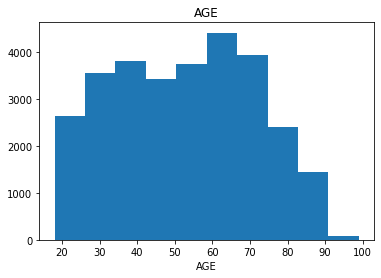

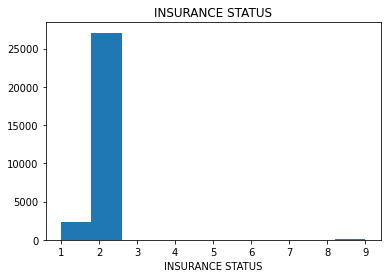

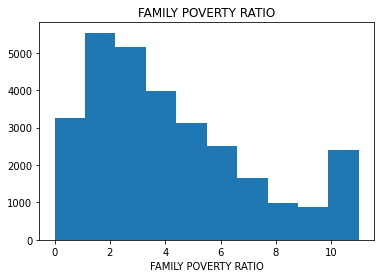

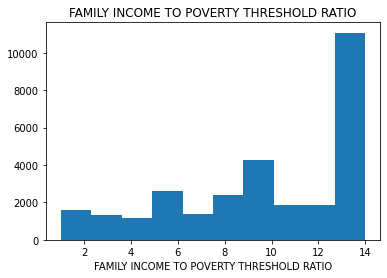

In [ ]:
#plotting the 3 columns using a for loop
for i in numerical_columns.columns:
    plt.figure()
    plt.title(i)
    plt.xlabel(i)
    plt.hist(df[i])

Source for plotting multiple numerical columns at once: https://stackoverflow.com/a/57707085

Source for making title of plots in for loop the column name: https://stackoverflow.com/questions/60886953/make-title-of-plots-in-for-loop-the-column-name-of-dataframe

### Compute basic statistics of numerical columns (sum, average, mean, median, etc.)

In [ ]:
numerical_columns.describe()

,AGE,INSURANCE STATUS,FAMILY POVERTY RATIO,FAMILY INCOME TO POVERTY THRESHOLD RATIO
count,29482.000000,29482.000000,29482.000000,29482.000000
mean,52.626959,1.944576,4.245687,9.847873
std,18.484035,0.486424,2.993698,4.011807
min,18.000000,1.000000,0.000000,1.000000
25%,37.000000,2.000000,1.910000,7.000000
50%,53.000000,2.000000,3.510000,11.000000
75%,68.000000,2.000000,5.770000,14.000000
max,99.000000,9.000000,11.000000,14.000000


### Calculate subgroup size of text/categorical data (i.e. with pivot tables)

In [ ]:
#Finding text/categorical data columns and making it a new dataframe
categorical = ['object']

categorical_columns = newdf.select_dtypes(include=categorical)

categorical_columns # df for categorical/text columns only 

,AGE (DOB not verified),SEX,HIGHEST EDUCATION,HISPANIC,PAYBILL,RACE,MOST RECENT DOCTOR VISIT,WELLNESS VISIT,TIME SINCE LAST VISIT,REGULAR DOCTOR ACCESS,TYPE OF PLACE FOR USUAL CARE,FREQ URGENT CARE VISITS LAST 12 MNTHS,FREQ ER VISITS LAST 12 MNTHS,HOSPITALIZED OVERNIGHT LAST 12 MNTHS,DELAYED MEDICAL CARE DUE TO COST,GENERAL HEALTH STATUS,HEALTH INSURANCE UNDER 65,HEALTH INSURANCE 65 AND UP,HAS PRIVATE INSURANCE,MEDICARE,MEDICARE SUPPLEMENT(MEDIGAP),MEDICAID,CHIP,"MILITARY(TRICARE,VA,CHAMP VA)",INDIAN HEALTH CARE,STATE SPONSORED HEALTH PLAN,OTHER GOVT PROGRAM,NO COVERAGE,DELAY IN CARE DUE TO COVID-19,NO CARE DUE TO COVID-19,TOOK PRESCRIP MEDS 12M,SKIP MEDS TO SAVE MONEY 12M,TOOK LESS MEDS TO SAVE MONEY 12M,DELAYED FILLING SCRIPTS TO SAVE 12M,DID NOT GET NEEDED RX DUE TO COST 12M,HOW OFTEN ANXIOUS?,LEVEL OF ANXIETY,HOW OFTEN DEPRESSED?,LEVEL OF DEPRESSED,INSURANCE OFFERED BY EMPLOYER,TYPE OF JOB,INCOME FROM WAGES,INCOME FROM ACCOUNTS,RETIREMENT INCOME(SS/RR),SSI/SSDI INCOME,SSI OR SSDI?,WELFARE INCOME,RETIREMENT INCOME,INCOME OTHER SOURCES,FOOD STAMPS 12M,WIC 12M,COULDNT AFFORD BALANCED MEALS,DIABETES,SKIPPED INSULIN DUE TO MONEY 12M,USED LESS INSULIN DUE TO MONEY 12M,DELAYED BUYING INSULIN TO SAVE MONEY 12M,HYPERTENSION,CANCER,COPD,CORONARY HEART DISEASE
0,Not Answered,male,Grade 1-11,no,no,white,w/i past year,w/i past year,Not Answered,yes,doctors office or health center,0 times,0 times,no,no,very good,private,Not Answered,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,mentioned,no,no,yes,no,Not Answered,Not Answered,Not Answered,Not Answered,yes,employee of private company,yes,no,Not Answered,no,Not Answered,no,no,no,no,Not Answered,never true,no,Not Answered,Not Answered,Not Answered,yes,no,no,no
1,Not Answered,male,Associate degree: academic program,no,no,Black/AFAM,w/i past year,w/i past year,Not Answered,yes,doctors office or health center,1 time,0 times,no,no,very good,private,Not Answered,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,mentioned,no,no,no,no,Not Answered,between a little and a lot,Not Answered,Not Answered,yes,employee of private company,yes,no,Not Answered,no,Not Answered,no,no,no,no,Not Answered,never true,yes,Not Answered,Not Answered,Not Answered,yes,no,no,no
2,Not Answered,male,Bachelors,no,no,white,w/i past year,w/i past year,Not Answered,yes,doctors office or health center,1 time,0 times,no,no,very good,private,Not Answered,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,mentioned,not mentioned,mentioned,no,no,no,no,Not Answered,between a little and a lot,Not Answered,a little,yes,employee of private company,yes,no,Not Answered,no,Not Answered,no,no,no,no,Not Answered,never true,no,Not Answered,Not Answered,Not Answered,no,no,no,no
3,Not Answered,female,"Some college, no degree",no,no,white,w/i past year,w/i past year,Not Answered,yes,doctors office or health center,0 times,4 times,yes,no,fair,other,Not Answered,not mentioned,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,mentioned,no,no,no,no,Not Answered,between a little and a lot,Not Answered,between a little and a lot,Not Answered,Not Answered,yes,no,Not Answered,yes,3.0,no,yes,yes,yes,Not Answered,never true,no,Not Answered,Not Answered,Not Answered,yes,no,no,no
4,Not Answered,male,High School Graduate,no,no,Black/AFAM,w/i past year,w/i past year,Not Answered,yes,Urgent care center or clinic in a drug store o...,2 times,3 times,no,no,good,private,Not Answered,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not me

In [ ]:
categorical_columns.dtypes

AGE (DOB not verified)                      object
SEX                                         object
HIGHEST EDUCATION                           object
HISPANIC                                    object
PAYBILL                                     object
RACE                                        object
MOST RECENT DOCTOR VISIT                    object
WELLNESS VISIT                              object
TIME SINCE LAST VISIT                       object
REGULAR DOCTOR ACCESS                       object
TYPE OF PLACE FOR USUAL CARE                object
FREQ URGENT CARE VISITS LAST 12 MNTHS       object
FREQ ER VISITS LAST 12 MNTHS                object
HOSPITALIZED OVERNIGHT LAST 12 MNTHS        object
DELAYED MEDICAL CARE DUE TO COST            object
GENERAL HEALTH STATUS                       object
HEALTH INSURANCE UNDER 65                   object
HEALTH INSURANCE 65 AND UP                  object
HAS PRIVATE INSURANCE                       object
MEDICARE                       

<ipython-input-46-294b2c86c8b0>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_columns = newdf.select_dtypes([np.object])
<ipython-input-46-294b2c86c8b0>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)
<ipython-input-46-294b2c86c8b0>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure

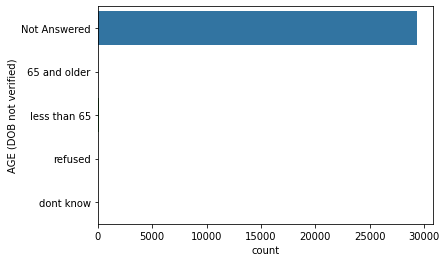

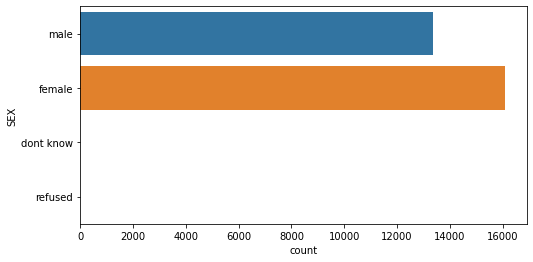

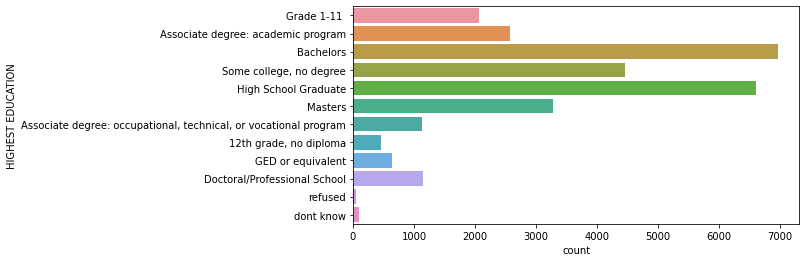

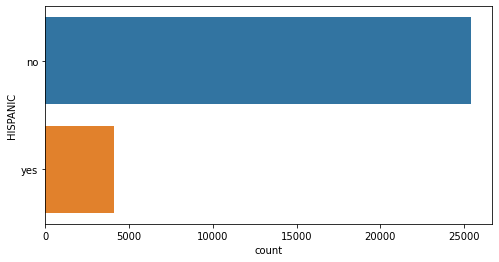

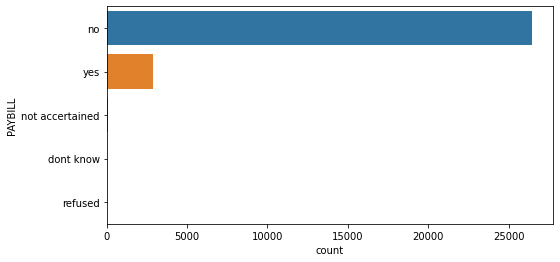

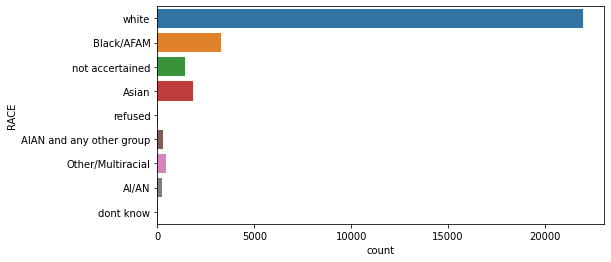

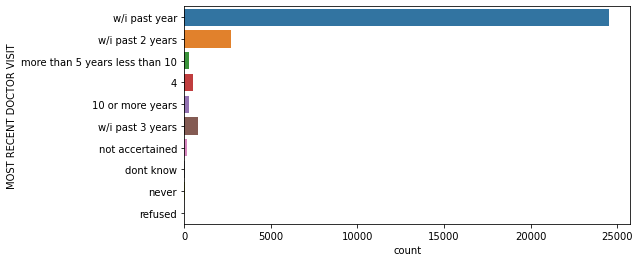

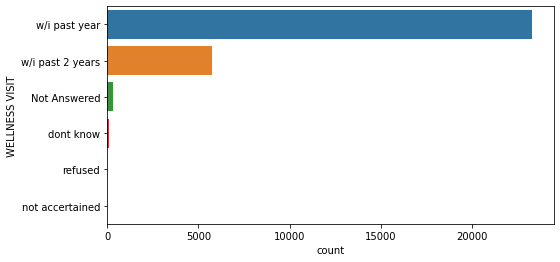

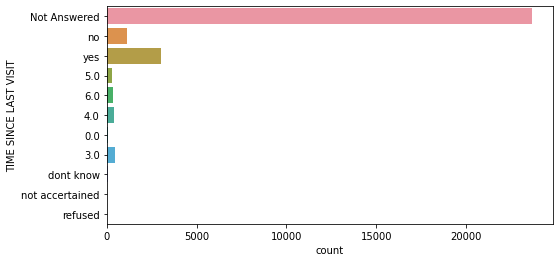

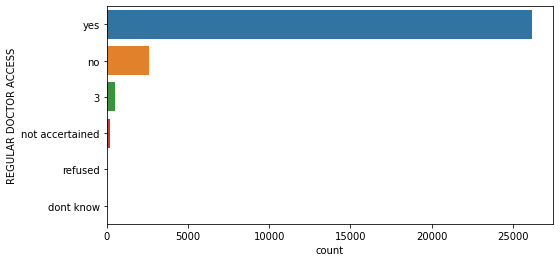

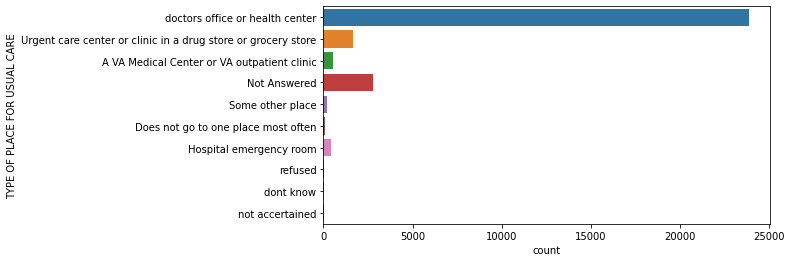

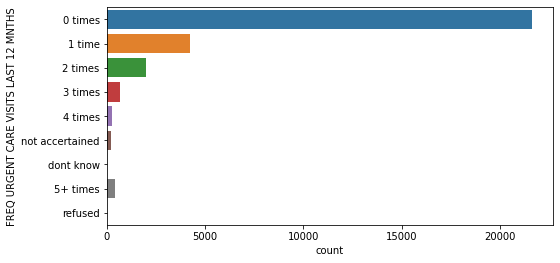

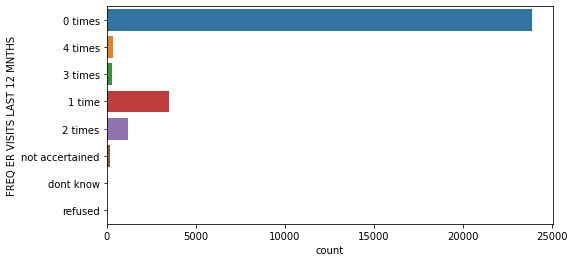

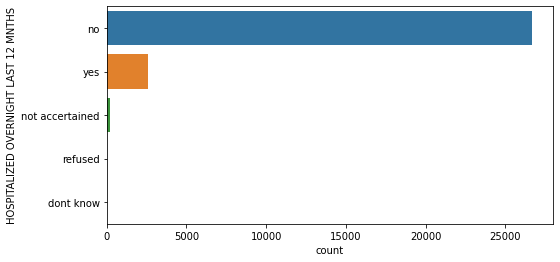

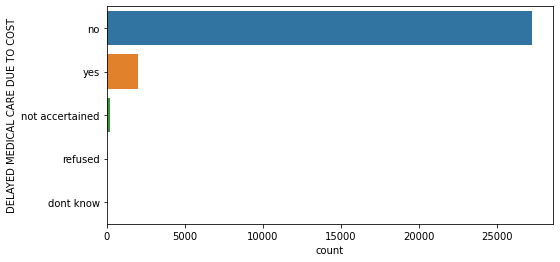

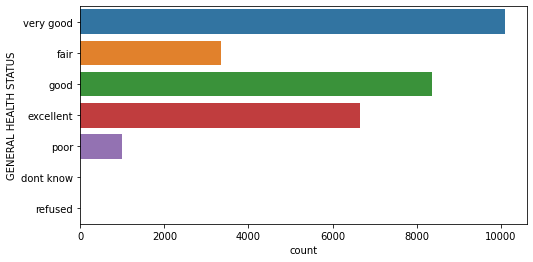

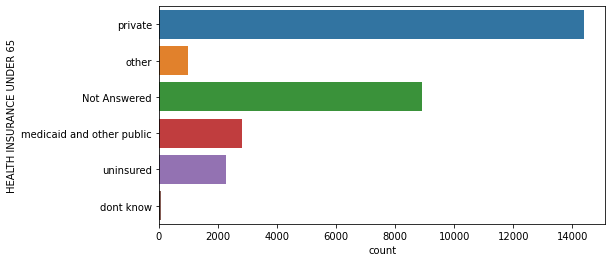

In [ ]:
categorical_columns = newdf.select_dtypes([np.object])
for i, col in enumerate(categorical_columns.columns):
    plt.figure(i)
    sns.countplot(y=col, dodge=True,data=categorical_columns)
    plt.rcParams["figure.figsize"] = (8, 4)

##### Some/all of these columns are numerical, but were just numbered differently.

# Finding the percentages of occurences in the most important columns 

In [ ]:
newdf['SEX'].value_counts(normalize=True) * 100

In [ ]:
newdf['RACE'].value_counts(normalize=True) * 100

In [ ]:
newdf['HIGHEST EDUCATION'].value_counts(normalize=True) * 100

In [ ]:
newdf['HEALTH INSURANCE UNDER 65'].value_counts(normalize=True) * 100

In [ ]:
newdf['HAS PRIVATE INSURANCE'].value_counts(normalize=True) * 100

In [ ]:
newdf['GENERAL HEALTH STATUS'].value_counts(normalize=True) * 100

In [ ]:
newdf['MEDICARE'].value_counts(normalize=True) * 100

In [ ]:
newdf['TYPE OF PLACE FOR USUAL CARE'].value_counts(normalize=True) * 100

In [ ]:
newdf['CHIP'].value_counts(normalize=True) * 100

In [ ]:
newdf['MILITARY(TRICARE,VA,CHAMP VA)'].value_counts(normalize=True) * 100

In [ ]:
newdf['STATE SPONSORED HEALTH PLAN'].value_counts(normalize=True) * 100

In [ ]:
newdf['INDIAN HEALTH CARE'].value_counts(normalize=True) * 100

In [ ]:
newdf['NO COVERAGE'].value_counts(normalize=True) * 100

In [ ]:
newdf['OTHER GOVT PROGRAM'].value_counts(normalize=True) * 100

In [ ]:
newdf['HYPERTENSION'].value_counts(normalize=True) * 100

In [ ]:
newdf['CANCER'].value_counts(normalize=True) * 100

In [ ]:
newdf['COPD'].value_counts(normalize=True) * 100

In [ ]:
newdf['CORONARY HEART DISEASE'].value_counts(normalize=True) * 100

In [ ]:
newdf['FOOD STAMPS 12M'].value_counts(normalize=True) * 100

In [ ]:
newdf['MEDICARE SUPPLEMENT(MEDIGAP)'].value_counts(normalize=True) * 100

In [ ]:
newdf['WIC 12M'].value_counts(normalize=True) * 100

# **Plot two-dimensional distributions of your variables of interest against your target variable(s):**

1. Across different values of your independent variable, how does the dependent
variable change?

In [ ]:
ax = newdf.hist(column='DIABETES', by='MEDICAID', grid=False, figsize=(15,10), color='#86bf91', zorder=2, rwidth=0.9)
plt.xlabel('Medicaid')
plt.ylabel('Ever Had Diabetes?')
#plt.title('Instances of Diabetes in Individuals with Medicaid')

In [ ]:
ax1 = newdf.hist(column='DIABETES', by='HAS PRIVATE INSURANCE' ,grid=False, figsize=(15,10), color='#86bf91', zorder=2, rwidth=0.9)


In [ ]:
ax2 = newdf.hist(column='MEDICAID', by="DIABETES" ,grid=False, figsize=(15,10), color='#86bf91', zorder=2, rwidth=0.9)


3. What trends do you see in the data? Do they support or contradict the hypothesis of your problem statement?


As we further condense our data analysis, we will be able to see if there is any correlation between the variables. 

In [ ]:
import seaborn as sns

In [ ]:
# calculate correlation matrix
corr = newdf.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
sampledf = df

In [ ]:
heatdf= sampledf['HIGHEST EDUCATION']
heatdf= sampledf['RACE']
heatdf= sampledf['GENERAL HEALTH STATUS']
heatdf= sampledf['HEALTH INSURANCE UNDER 65']
heatdf

In [ ]:
df.columns

In [ ]:
table1 = newdf.set_index(["HEALTH INSURANCE UNDER 65", "HEALTH INSURANCE 65 AND UP", "GENERAL HEALTH STATUS"])
df.head(20)

In [ ]:
df.dtypes

In [ ]:
df.info

In [ ]:
  insurance_type = []

for i in range(len(df)):
    if df.loc[i, 'MEDICAID'] == 1 or df.loc[i, 'MEDICARE'] == 1 or df.loc[i, 'CHIP'] == 1 or df.loc[i, 'INDIAN HEALTH CARE'] == 1 or df.loc[i, 'STATE SPONSORED HEALTH PLAN'] == 1 or df.loc[i, 'MEDICARE SUPPLEMENT(MEDIGAP)'] == 1 or df.loc[i, 'MILITARY(TRICARE,VA,CHAMP VA)'] == 1:
        insurance_type.append('PUBLIC')
    elif df.loc[i, 'HAS PRIVATE INSURANCE'] == 1:
        insurance_type.append('PRIVATE')
    elif df.loc[i, 'NO COVERAGE'] == 1:
        insurance_type.append('NO COVERAGE')
    elif df.loc[i, 'OTHER GOVT PROGRAM'] == 1 :
        insurance_type.append('OTHER')
    else:
        insurance_type.append('Not Available')

df['Insurance_Type'] = insurance_type

In [ ]:
 disease_type = []

for i in range(len(df)):
    if df.loc[i, 'CORONARY HEART DISEASE'] == 1 :
        disease_type.append('CORONARY HEART DISEASE')
    elif df.loc[i, 'HYPERTENSION'] == 1:
        disease_type.append('HYPERTENSION')
    elif df.loc[i, 'COPD'] == 1:
        disease_type.append('COPD')
    elif df.loc[i, 'CANCER'] == 1 :
        disease_type.append('CANCER')
    elif df.loc[i, 'DIABETES'] == 1 :
        disease_type.append('DIABETES')
    else:
        disease_type.append('Not Available')

df['Disease_Type'] = disease_type

In [ ]:
disease_type = []

for i in range(len(newdf)):
    if newdf.loc[i, 'CORONARY HEART DISEASE'] == 'yes' :
        disease_type.append('CORONARY HEART DISEASE')
    elif newdf.loc[i, 'HYPERTENSION'] == 'yes':
        disease_type.append('HYPERTENSION')
    elif newdf.loc[i, 'COPD'] == 'yes':
        disease_type.append('COPD')
    elif newdf.loc[i, 'CANCER'] == 'yes' :
        disease_type.append('CANCER')
    elif newdf.loc[i, 'DIABETES'] == 'yes' :
        disease_type.append('DIABETES')
    else:
        disease_type.append('Not Available')

newdf['Disease_Type'] = disease_type

In [ ]:
df

,AGE,AGE (DOB not verified),SEX,HIGHEST EDUCATION,HISPANIC,PAYBILL,RACE,MOST RECENT DOCTOR VISIT,WELLNESS VISIT,TIME SINCE LAST VISIT,REGULAR DOCTOR ACCESS,TYPE OF PLACE FOR USUAL CARE,FREQ URGENT CARE VISITS LAST 12 MNTHS,FREQ ER VISITS LAST 12 MNTHS,HOSPITALIZED OVERNIGHT LAST 12 MNTHS,DELAYED MEDICAL CARE DUE TO COST,GENERAL HEALTH STATUS,HEALTH INSURANCE UNDER 65,HEALTH INSURANCE 65 AND UP,INSURANCE STATUS,HAS PRIVATE INSURANCE,MEDICARE,MEDICARE SUPPLEMENT(MEDIGAP),MEDICAID,CHIP,"MILITARY(TRICARE,VA,CHAMP VA)",INDIAN HEALTH CARE,STATE SPONSORED HEALTH PLAN,OTHER GOVT PROGRAM,NO COVERAGE,DELAY IN CARE DUE TO COVID-19,NO CARE DUE TO COVID-19,TOOK PRESCRIP MEDS 12M,SKIP MEDS TO SAVE MONEY 12M,TOOK LESS MEDS TO SAVE MONEY 12M,DELAYED FILLING SCRIPTS TO SAVE 12M,DID NOT GET NEEDED RX DUE TO COST 12M,HOW OFTEN ANXIOUS?,LEVEL OF ANXIETY,HOW OFTEN DEPRESSED?,LEVEL OF DEPRESSED,INSURANCE OFFERED BY EMPLOYER,FAMILY POVERTY RATIO,TYPE OF JOB,INCOME FROM WAGES,INCOME FROM ACCOUNTS,RETIREMENT INCOME(SS/RR),SSI/SSDI INCOME,SSI OR SSDI?,WELFARE INCOME,RETIREMENT INCOME,INCOME OTHER SOURCES,FAMILY INCOME TO POVERTY THRESHOLD RATIO,FOOD STAMPS 12M,WIC 12M,COULDNT AFFORD BALANCED MEALS,DIABETES,SKIPPED INSULIN DUE TO MONEY 12M,USED LESS INSULIN DUE TO MONEY 12M,DELAYED BUYING INSULIN TO SAVE MONEY 12M,HYPERTENSION,CANCER,COPD,CORONARY HEART DISEASE,Insurance_Type,Disease_Type
0,50,Not Answered,1,1,2,2,1,1,1.0,Not Answered,1,1.0,0,0,2,2,2,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2.0,2.0,1.0,2,Not Answered,Not Answered,Not Answered,Not Answered,1.0,1.93,1.0,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,7,2,Not Answered,3,2,Not Answered,Not Answered,Not Answered,1,2,2,2,PRIVATE,HYPERTENSION
1,53,Not Answered,1,7,2,2,2,1,1.0,Not Answered,1,1.0,1,0,2,2,2,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2.0,2.0,2.0,2,Not Answered,3.0,Not Answered,Not Answered,1.0,4.45,1.0,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,12,2,Not Answered,3,1,Not Answered,Not Answered,Not Answered,1,2,2,2,PRIVATE,HYPERTENSION
2,56,Not Answered,1,8,2,2,1,1,1.0,Not Answered,1,1.0,1,0,2,2,2,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,1,2,1,2.0,2.0,2.0,2,Not Answered,3.0,Not Answered,1.0,1.0,5.94,1.0,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,14,2,Not Answered,3,2,Not Answered,Not Answered,Not Answered,2,2,2,2,PRIVATE,Not Available
3,57,Not Answered,2,5,2,2,1,1,1.0,Not Answered,1,1.0,0,4,1,2,4,3.0,Not Answered,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2.0,2.0,2.0,2,Not Answered,3.0,Not Answered,3.0,Not Answered,3.70,Not Answered,1,2,Not Answered,1.0,3.0,2.0,1.0,1.0,11,1,Not Answered,3,2,Not Answered,Not Answered,Not Answered,1,2,2,2,PUBLIC,HYPERTENSION
4,25,Not Answered,1,4,2,2,2,1,1.0,Not Answered,1,2.0,2,3,2,2,3,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2,2,2,Not Answered,Not Answered,Not Answered,2,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,1.66,Not Answered,8,8,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,6,8,Not Answered,8,2,Not Answered,Not Answered,Not Answered,2,2,2,2,PRIVATE,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29477,70,Not Answered,2,9,2,2,1,1,1.0,Not Answered,1,1.0,1,0,2,2,2,Not Answered,1.0,2,1,1,2,2,2,2,2,2,2,2,2,2,1,2.0,2.0,2.0,2,Not Answered,1.0,Not Answered,2.0,Not Answered,5.11,Not Answered,2,1,Not Answered,2.0,Not Answered,2.0,2.0,2.0,14,2,Not Answered,3,2,Not Answered,Not Answered,Not Answered,2,2,2,2,PUBLIC,Not Available
29478,35,Not Answered,2,7,1,1,8,1,2.0,1.0,1,1.0,2,1,2,2,4,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2,2,1,1.0,1.0,1.0,2,Not Answered,3.0,Not Answered,3.0,1.0,3.03,1.0,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,10,2,2.0,3,1,Not Answered,1.0,1.0,2,2,2,2,PRIVATE,DIABETES
29479,72,Not Answered,2,4,2,2,1,2,1.0,Not Answered,1,1.0,0,1,2,2,2,Not Answered,3.0,2,2,1,2,

In [ ]:
newdf

,AGE,AGE (DOB not verified),SEX,HIGHEST EDUCATION,HISPANIC,PAYBILL,RACE,MOST RECENT DOCTOR VISIT,WELLNESS VISIT,TIME SINCE LAST VISIT,REGULAR DOCTOR ACCESS,TYPE OF PLACE FOR USUAL CARE,FREQ URGENT CARE VISITS LAST 12 MNTHS,FREQ ER VISITS LAST 12 MNTHS,HOSPITALIZED OVERNIGHT LAST 12 MNTHS,DELAYED MEDICAL CARE DUE TO COST,GENERAL HEALTH STATUS,HEALTH INSURANCE UNDER 65,HEALTH INSURANCE 65 AND UP,INSURANCE STATUS,HAS PRIVATE INSURANCE,MEDICARE,MEDICARE SUPPLEMENT(MEDIGAP),MEDICAID,CHIP,"MILITARY(TRICARE,VA,CHAMP VA)",INDIAN HEALTH CARE,STATE SPONSORED HEALTH PLAN,OTHER GOVT PROGRAM,NO COVERAGE,DELAY IN CARE DUE TO COVID-19,NO CARE DUE TO COVID-19,TOOK PRESCRIP MEDS 12M,SKIP MEDS TO SAVE MONEY 12M,TOOK LESS MEDS TO SAVE MONEY 12M,DELAYED FILLING SCRIPTS TO SAVE 12M,DID NOT GET NEEDED RX DUE TO COST 12M,HOW OFTEN ANXIOUS?,LEVEL OF ANXIETY,HOW OFTEN DEPRESSED?,LEVEL OF DEPRESSED,INSURANCE OFFERED BY EMPLOYER,FAMILY POVERTY RATIO,TYPE OF JOB,INCOME FROM WAGES,INCOME FROM ACCOUNTS,RETIREMENT INCOME(SS/RR),SSI/SSDI INCOME,SSI OR SSDI?,WELFARE INCOME,RETIREMENT INCOME,INCOME OTHER SOURCES,FAMILY INCOME TO POVERTY THRESHOLD RATIO,FOOD STAMPS 12M,WIC 12M,COULDNT AFFORD BALANCED MEALS,DIABETES,SKIPPED INSULIN DUE TO MONEY 12M,USED LESS INSULIN DUE TO MONEY 12M,DELAYED BUYING INSULIN TO SAVE MONEY 12M,HYPERTENSION,CANCER,COPD,CORONARY HEART DISEASE,Disease_Type
0,50,Not Answered,male,Grade 1-11,no,no,white,w/i past year,w/i past year,Not Answered,yes,doctors office or health center,0 times,0 times,no,no,very good,private,Not Answered,2,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,mentioned,no,no,yes,no,Not Answered,Not Answered,Not Answered,Not Answered,yes,1.93,employee of private company,yes,no,Not Answered,no,Not Answered,no,no,no,7,no,Not Answered,never true,no,Not Answered,Not Answered,Not Answered,yes,no,no,no,HYPERTENSION
1,53,Not Answered,male,Associate degree: academic program,no,no,Black/AFAM,w/i past year,w/i past year,Not Answered,yes,doctors office or health center,1 time,0 times,no,no,very good,private,Not Answered,2,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,mentioned,no,no,no,no,Not Answered,between a little and a lot,Not Answered,Not Answered,yes,4.45,employee of private company,yes,no,Not Answered,no,Not Answered,no,no,no,12,no,Not Answered,never true,yes,Not Answered,Not Answered,Not Answered,yes,no,no,no,HYPERTENSION
2,56,Not Answered,male,Bachelors,no,no,white,w/i past year,w/i past year,Not Answered,yes,doctors office or health center,1 time,0 times,no,no,very good,private,Not Answered,2,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,mentioned,not mentioned,mentioned,no,no,no,no,Not Answered,between a little and a lot,Not Answered,a little,yes,5.94,employee of private company,yes,no,Not Answered,no,Not Answered,no,no,no,14,no,Not Answered,never true,no,Not Answered,Not Answered,Not Answered,no,no,no,no,Not Available
3,57,Not Answered,female,"Some college, no degree",no,no,white,w/i past year,w/i past year,Not Answered,yes,doctors office or health center,0 times,4 times,yes,no,fair,other,Not Answered,2,not mentioned,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,mentioned,no,no,no,no,Not Answered,between a little and a lot,Not Answered,between a little and a lot,Not Answered,3.70,Not Answered,yes,no,Not Answered,yes,3.0,no,yes,yes,11,yes,Not Answered,never true,no,Not Answered,Not Answered,Not Answered,yes,no,no,no,HYPERTENSION
4,25,Not Answered,male,High School Graduate,no,no,Black/AFAM,w/i past year,w/i past year,Not Answered,yes,Urgent care center or clinic in a drug store o...,2 times,3 times

In [ ]:
coverage_all = []

for i in range(len(df)):
    if df.loc[i, 'HEALTH INSURANCE UNDER 65'] == 1:
        coverage_all.append('PRIVATE')
    elif df.loc[i, 'HEALTH INSURANCE UNDER 65'] == 2:
        coverage_all.append('PUBLIC')
    elif df.loc[i, 'HEALTH INSURANCE UNDER 65'] == 3:
        coverage_all.append('OTHER')
    elif df.loc[i, 'HEALTH INSURANCE UNDER 65'] == 4 :
        coverage_all.append('NO COVERAGE')
    elif df.loc[i, 'HEALTH INSURANCE UNDER 65'] == 5:
        coverage_all.append('NOT AVAILABLE')
    elif df.loc[i, 'HEALTH INSURANCE 65 AND UP'] == 1:
        coverage_all.append('PRIVATE')
    elif df.loc[i, 'HEALTH INSURANCE 65 AND UP'] == 2:
        coverage_all.append('OTHER')
    elif df.loc[i, 'HEALTH INSURANCE 65 AND UP'] == 3:
        coverage_all.append('PUBLIC')
    elif df.loc[i, 'HEALTH INSURANCE 65 AND UP'] == 4:
        coverage_all.append('PUBLIC')
    elif df.loc[i, 'HEALTH INSURANCE 65 AND UP'] == 5 :
        coverage_all.append('OTHER')
    elif df.loc[i, 'HEALTH INSURANCE 65 AND UP'] == 6:
        coverage_all.append('NO COVERAGE')
    elif df.loc[i, 'HEALTH INSURANCE 65 AND UP'] == 7:
        coverage_all.append('NOT AVAILABLE')
    else:
        coverage_all.append('NOT AVAILABLE')

df['ALL COVERAGE'] = coverage_all

In [ ]:
coverage_all = []

for i in range(len(newdf)):
    if newdf.loc[i, 'HEALTH INSURANCE UNDER 65'] == 'private':
        coverage_all.append('PRIVATE')
    elif newdf.loc[i, 'HEALTH INSURANCE UNDER 65'] == 'medicaid and other public':
        coverage_all.append('PUBLIC')
    elif newdf.loc[i, 'HEALTH INSURANCE UNDER 65'] == 'other':
        coverage_all.append('OTHER')
    elif newdf.loc[i, 'HEALTH INSURANCE UNDER 65'] == 'uninsured' :
        coverage_all.append('NO COVERAGE')
    elif newdf.loc[i, 'HEALTH INSURANCE UNDER 65'] == 'Not Answered':
        coverage_all.append('NOT AVAILABLE')
    elif newdf.loc[i, 'HEALTH INSURANCE UNDER 65'] == 'dont know':
        coverage_all.append('NOT AVAILABLE')
    elif newdf.loc[i, 'HEALTH INSURANCE 65 AND UP'] == 'private':
        coverage_all.append('PRIVATE')
    elif newdf.loc[i, 'HEALTH INSURANCE 65 AND UP'] == 'dual eligible':
        coverage_all.append('OTHER')
    elif newdf.loc[i, 'HEALTH INSURANCE 65 AND UP'] == 'medicare advantage':
        coverage_all.append('PUBLIC')
    elif newdf.loc[i, 'HEALTH INSURANCE 65 AND UP'] == 'medicare only no MA':
        coverage_all.append('PUBLIC')
    elif newdf.loc[i, 'HEALTH INSURANCE 65 AND UP'] == 'other' :
        coverage_all.append('OTHER')
    elif newdf.loc[i, 'HEALTH INSURANCE 65 AND UP'] == 'uninsured':
        coverage_all.append('NO COVERAGE')
    elif newdf.loc[i, 'HEALTH INSURANCE 65 AND UP'] == 'dont know ':
        coverage_all.append('NOT AVAILABLE')
    else:
        coverage_all.append('NOT AVAILABLE')

newdf['ALL COVERAGE'] = coverage_all

In [ ]:
newdf['ALL COVERAGE'].unique()

array(['PRIVATE', 'OTHER', 'NOT AVAILABLE', 'PUBLIC', 'NO COVERAGE'],
      dtype=object)

In [ ]:
newdf

,AGE,AGE (DOB not verified),SEX,HIGHEST EDUCATION,HISPANIC,PAYBILL,RACE,MOST RECENT DOCTOR VISIT,WELLNESS VISIT,TIME SINCE LAST VISIT,REGULAR DOCTOR ACCESS,TYPE OF PLACE FOR USUAL CARE,FREQ URGENT CARE VISITS LAST 12 MNTHS,FREQ ER VISITS LAST 12 MNTHS,HOSPITALIZED OVERNIGHT LAST 12 MNTHS,DELAYED MEDICAL CARE DUE TO COST,GENERAL HEALTH STATUS,HEALTH INSURANCE UNDER 65,HEALTH INSURANCE 65 AND UP,INSURANCE STATUS,HAS PRIVATE INSURANCE,MEDICARE,MEDICARE SUPPLEMENT(MEDIGAP),MEDICAID,CHIP,"MILITARY(TRICARE,VA,CHAMP VA)",INDIAN HEALTH CARE,STATE SPONSORED HEALTH PLAN,OTHER GOVT PROGRAM,NO COVERAGE,DELAY IN CARE DUE TO COVID-19,NO CARE DUE TO COVID-19,TOOK PRESCRIP MEDS 12M,SKIP MEDS TO SAVE MONEY 12M,TOOK LESS MEDS TO SAVE MONEY 12M,DELAYED FILLING SCRIPTS TO SAVE 12M,DID NOT GET NEEDED RX DUE TO COST 12M,HOW OFTEN ANXIOUS?,LEVEL OF ANXIETY,HOW OFTEN DEPRESSED?,LEVEL OF DEPRESSED,INSURANCE OFFERED BY EMPLOYER,FAMILY POVERTY RATIO,TYPE OF JOB,INCOME FROM WAGES,INCOME FROM ACCOUNTS,RETIREMENT INCOME(SS/RR),SSI/SSDI INCOME,SSI OR SSDI?,WELFARE INCOME,RETIREMENT INCOME,INCOME OTHER SOURCES,FAMILY INCOME TO POVERTY THRESHOLD RATIO,FOOD STAMPS 12M,WIC 12M,COULDNT AFFORD BALANCED MEALS,DIABETES,SKIPPED INSULIN DUE TO MONEY 12M,USED LESS INSULIN DUE TO MONEY 12M,DELAYED BUYING INSULIN TO SAVE MONEY 12M,HYPERTENSION,CANCER,COPD,CORONARY HEART DISEASE,Disease_Type,ALL COVERAGE
0,50,Not Answered,male,Grade 1-11,no,no,white,w/i past year,w/i past year,Not Answered,yes,doctors office or health center,0 times,0 times,no,no,very good,private,Not Answered,2,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,mentioned,no,no,yes,no,Not Answered,Not Answered,Not Answered,Not Answered,yes,1.93,employee of private company,yes,no,Not Answered,no,Not Answered,no,no,no,7,no,Not Answered,never true,no,Not Answered,Not Answered,Not Answered,yes,no,no,no,HYPERTENSION,PRIVATE
1,53,Not Answered,male,Associate degree: academic program,no,no,Black/AFAM,w/i past year,w/i past year,Not Answered,yes,doctors office or health center,1 time,0 times,no,no,very good,private,Not Answered,2,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,mentioned,no,no,no,no,Not Answered,between a little and a lot,Not Answered,Not Answered,yes,4.45,employee of private company,yes,no,Not Answered,no,Not Answered,no,no,no,12,no,Not Answered,never true,yes,Not Answered,Not Answered,Not Answered,yes,no,no,no,HYPERTENSION,PRIVATE
2,56,Not Answered,male,Bachelors,no,no,white,w/i past year,w/i past year,Not Answered,yes,doctors office or health center,1 time,0 times,no,no,very good,private,Not Answered,2,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,mentioned,not mentioned,mentioned,no,no,no,no,Not Answered,between a little and a lot,Not Answered,a little,yes,5.94,employee of private company,yes,no,Not Answered,no,Not Answered,no,no,no,14,no,Not Answered,never true,no,Not Answered,Not Answered,Not Answered,no,no,no,no,Not Available,PRIVATE
3,57,Not Answered,female,"Some college, no degree",no,no,white,w/i past year,w/i past year,Not Answered,yes,doctors office or health center,0 times,4 times,yes,no,fair,other,Not Answered,2,not mentioned,mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,mentioned,no,no,no,no,Not Answered,between a little and a lot,Not Answered,between a little and a lot,Not Answered,3.70,Not Answered,yes,no,Not Answered,yes,3.0,no,yes,yes,11,yes,Not Answered,never true,no,Not Answered,Not Answered,Not Answered,yes,no,no,no,HYPERTENSION,OTHER
4,25,Not Answered,male,High School Graduate,no,no,Black/AFAM,w/i past year,w/i past year,Not Answered,yes,Urgent care center or 

In [ ]:
df

,AGE,AGE (DOB not verified),SEX,HIGHEST EDUCATION,HISPANIC,PAYBILL,RACE,MOST RECENT DOCTOR VISIT,WELLNESS VISIT,TIME SINCE LAST VISIT,REGULAR DOCTOR ACCESS,TYPE OF PLACE FOR USUAL CARE,FREQ URGENT CARE VISITS LAST 12 MNTHS,FREQ ER VISITS LAST 12 MNTHS,HOSPITALIZED OVERNIGHT LAST 12 MNTHS,DELAYED MEDICAL CARE DUE TO COST,GENERAL HEALTH STATUS,HEALTH INSURANCE UNDER 65,HEALTH INSURANCE 65 AND UP,INSURANCE STATUS,HAS PRIVATE INSURANCE,MEDICARE,MEDICARE SUPPLEMENT(MEDIGAP),MEDICAID,CHIP,"MILITARY(TRICARE,VA,CHAMP VA)",INDIAN HEALTH CARE,STATE SPONSORED HEALTH PLAN,OTHER GOVT PROGRAM,NO COVERAGE,DELAY IN CARE DUE TO COVID-19,NO CARE DUE TO COVID-19,TOOK PRESCRIP MEDS 12M,SKIP MEDS TO SAVE MONEY 12M,TOOK LESS MEDS TO SAVE MONEY 12M,DELAYED FILLING SCRIPTS TO SAVE 12M,DID NOT GET NEEDED RX DUE TO COST 12M,HOW OFTEN ANXIOUS?,LEVEL OF ANXIETY,HOW OFTEN DEPRESSED?,LEVEL OF DEPRESSED,INSURANCE OFFERED BY EMPLOYER,FAMILY POVERTY RATIO,TYPE OF JOB,INCOME FROM WAGES,INCOME FROM ACCOUNTS,RETIREMENT INCOME(SS/RR),SSI/SSDI INCOME,SSI OR SSDI?,WELFARE INCOME,RETIREMENT INCOME,INCOME OTHER SOURCES,FAMILY INCOME TO POVERTY THRESHOLD RATIO,FOOD STAMPS 12M,WIC 12M,COULDNT AFFORD BALANCED MEALS,DIABETES,SKIPPED INSULIN DUE TO MONEY 12M,USED LESS INSULIN DUE TO MONEY 12M,DELAYED BUYING INSULIN TO SAVE MONEY 12M,HYPERTENSION,CANCER,COPD,CORONARY HEART DISEASE,Insurance_Type,Disease_Type,ALL COVERAGE
0,50,Not Answered,1,1,2,2,1,1,1.0,Not Answered,1,1.0,0,0,2,2,2,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2.0,2.0,1.0,2,Not Answered,Not Answered,Not Answered,Not Answered,1.0,1.93,1.0,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,7,2,Not Answered,3,2,Not Answered,Not Answered,Not Answered,1,2,2,2,PRIVATE,HYPERTENSION,PRIVATE
1,53,Not Answered,1,7,2,2,2,1,1.0,Not Answered,1,1.0,1,0,2,2,2,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2.0,2.0,2.0,2,Not Answered,3.0,Not Answered,Not Answered,1.0,4.45,1.0,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,12,2,Not Answered,3,1,Not Answered,Not Answered,Not Answered,1,2,2,2,PRIVATE,HYPERTENSION,PRIVATE
2,56,Not Answered,1,8,2,2,1,1,1.0,Not Answered,1,1.0,1,0,2,2,2,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,1,2,1,2.0,2.0,2.0,2,Not Answered,3.0,Not Answered,1.0,1.0,5.94,1.0,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,14,2,Not Answered,3,2,Not Answered,Not Answered,Not Answered,2,2,2,2,PRIVATE,Not Available,PRIVATE
3,57,Not Answered,2,5,2,2,1,1,1.0,Not Answered,1,1.0,0,4,1,2,4,3.0,Not Answered,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2.0,2.0,2.0,2,Not Answered,3.0,Not Answered,3.0,Not Answered,3.70,Not Answered,1,2,Not Answered,1.0,3.0,2.0,1.0,1.0,11,1,Not Answered,3,2,Not Answered,Not Answered,Not Answered,1,2,2,2,PUBLIC,HYPERTENSION,OTHER
4,25,Not Answered,1,4,2,2,2,1,1.0,Not Answered,1,2.0,2,3,2,2,3,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2,2,2,Not Answered,Not Answered,Not Answered,2,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,1.66,Not Answered,8,8,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,Not Answered,6,8,Not Answered,8,2,Not Answered,Not Answered,Not Answered,2,2,2,2,PRIVATE,Not Available,PRIVATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29477,70,Not Answered,2,9,2,2,1,1,1.0,Not Answered,1,1.0,1,0,2,2,2,Not Answered,1.0,2,1,1,2,2,2,2,2,2,2,2,2,2,1,2.0,2.0,2.0,2,Not Answered,1.0,Not Answered,2.0,Not Answered,5.11,Not Answered,2,1,Not Answered,2.0,Not Answered,2.0,2.0,2.0,14,2,Not Answered,3,2,Not Answered,Not Answered,Not Answered,2,2,2,2,PUBLIC,Not Available,PRIVATE
29478,35,Not Answered,2,7,1,1,8,1,2.0,1.0,1,1.0,2,1,2,2,4,1.0,Not Answered,2,1,2,2,2,2,2,2,2,2,2,2,2,1,1.0,1.0,1.0,2,Not Answered,3.0,Not Answered,3.0,1.0,3.03,1.0,1,2,Not Answered,2.0,Not Answered,2.0,2.0,2.0,10,2,2.0,3,1,Not Answered,1.0,1.0,2,2,2,2,PRIVATE,DIABETES,PRIVATE
29479,72,Not Answered

In [ ]:
newdf['HEALTH INSURANCE UNDER 65'].value_counts()

private                      14403
Not Answered                  8908
medicaid and other public     2816
uninsured                     2274
other                          999
dont know                       82
Name: HEALTH INSURANCE UNDER 65, dtype: int64

In [ ]:
newdf['HEALTH INSURANCE 65 AND UP'].value_counts()

Not Answered           20575
private                 3410
medicare advantage      3031
medicare only no MA     1079
other                    742
dual eligible            585
uninsured                 39
dont know                 21
Name: HEALTH INSURANCE 65 AND UP, dtype: int64

In [ ]:
print(df['Insurance_Type'].value_counts())

PRIVATE          14349
PUBLIC           12516
NO COVERAGE       2236
OTHER              276
Not Available      105
Name: Insurance_Type, dtype: int64


In [ ]:
print(df['ALL COVERAGE'].value_counts())

PRIVATE          17813
PUBLIC            6926
OTHER             2326
NO COVERAGE       2313
NOT AVAILABLE      104
Name: ALL COVERAGE, dtype: int64


In [ ]:
print(newdf['ALL COVERAGE'].value_counts())

PRIVATE          14403
NOT AVAILABLE     8990
PUBLIC            2816
NO COVERAGE       2274
OTHER              999
Name: ALL COVERAGE, dtype: int64


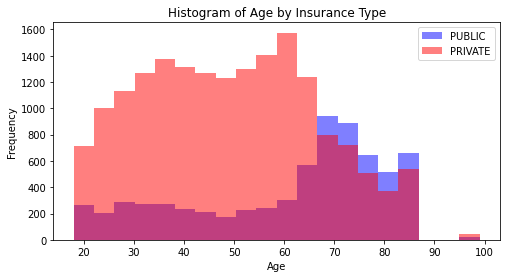

In [ ]:
#creating a histogram to see if the data is skewed -- AGE
public_df = df[df['ALL COVERAGE'] == 'PUBLIC']
private_df = df[df['ALL COVERAGE'] == 'PRIVATE']

plt.hist(public_df['AGE'], bins = 20, color = 'blue', alpha = 0.5, label = 'PUBLIC')
plt.hist(private_df['AGE'], bins = 20, color = 'red', alpha = 0.5, label = 'PRIVATE')
plt.legend(loc = 'upper right')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age by Insurance Type')
plt.show()

In [ ]:
#creating a histogram to see if the data is skewed -- AGE
public_df = df[df['ALL COVERAGE'] == 'PUBLIC']
#private_df = df[df['ALL COVERAGE'] == 'PRIVATE']

plt.hist(public_df['AGE'], bins = 20, color = 'blue', alpha = 0.5, label = 'PUBLIC')
#plt.hist(private_df['AGE'], bins = 20, color = 'red', alpha = 0.5, label = 'PRIVATE')
plt.legend(loc = 'upper right')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age by Insurance Type')
plt.show()

In [ ]:
#creating a histogram to see if the data is skewed -- AGE
#public_df = df[df['ALL COVERAGE'] == 'PUBLIC']
private_df = df[df['ALL COVERAGE'] == 'PRIVATE']

#plt.hist(public_df['AGE'], bins = 20, color = 'blue', alpha = 0.5, label = 'PUBLIC')
plt.hist(private_df['AGE'], bins = 20, color = 'red', alpha = 0.5, label = 'PRIVATE')
plt.legend(loc = 'upper right')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age by Insurance Type')
plt.show()

More older people rely on public insurance

In [ ]:
#t-test
t_stat, p_value = stats.ttest_ind(public_df['AGE'], private_df['AGE'])
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

In [ ]:
#creating a historgram to see if the data is skewed --poverty
plt.hist(public_df['FAMILY INCOME TO POVERTY THRESHOLD RATIO'], bins = 20, color = 'blue', alpha = 0.5, label = 'PUBLIC')
plt.hist(private_df['FAMILY INCOME TO POVERTY THRESHOLD RATIO'], bins = 20, color = 'red', alpha = 0.5, label = 'PRIVATE')
plt.legend(loc = 'upper right')
plt.xlabel('FAMILY INCOME TO POVERTY THRESHOLD RATIO')
plt.ylabel('Frequency')
plt.title('Histogram of Age by Insurance Type')
plt.show()

In [ ]:
t_stat, p_value = stats.ttest_ind(public_df['FAMILY INCOME TO POVERTY THRESHOLD RATIO'], private_df['FAMILY INCOME TO POVERTY THRESHOLD RATIO'])
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

In [ ]:
public_mean = public_df['FAMILY INCOME TO POVERTY THRESHOLD RATIO'].mean()
private_mean = private_df['FAMILY INCOME TO POVERTY THRESHOLD RATIO'].mean()
print(public_mean)
print( private_mean)

In [ ]:
spaceless=df.copy()

In [ ]:
spaceless

In [ ]:
spaceless = spaceless.rename(columns={'ALL COVERAGE': 'ALL_COVERAGE','FAMILY INCOME TO POVERTY THRESHOLD RATIO':'FAM_RATIO1','FAMILY POVERTY RATIO':'FAMR2','HOW OFTEN DEPESSED?':'DEPRESSED'})

In [ ]:
spaceless.dtypes

In [ ]:
#Linear Regression - AGE
formula1='AGE ~ ALL_COVERAGE'
model = sm.ols(formula=formula1, data=spaceless)
fitted = model.fit()
print(fitted.summary())

In [ ]:
pd.isna(spaceless['FAM_RATIO1']).sum()

In [ ]:
#Linear Regression - poverty1
formula2=' FAM_RATIO1 ~ALL_COVERAGE  '
model2 = sm.ols(formula=formula2, data=spaceless)
fitted2 = model2.fit()
print(fitted2.summary())

In [ ]:
#Linear Regression - poverty2
formula2='FAMR2~ALL_COVERAGE'
model2 = sm.ols(formula=formula2, data=spaceless)
fitted2 = model2.fit()
print(fitted2.summary())

In [ ]:
newdf['ALL COVERAGE'].value_counts()

In [ ]:
#contingency table
edu_crosstab = pd.crosstab(df['ALL COVERAGE'],
                            df['HIGHEST EDUCATION'], 
                               margins = True)
print(edu_crosstab)

In [ ]:
edu_crosstab.index

In [ ]:
edu_chi=edu_crosstab.loc[['NO COVERAGE','OTHER', 'PRIVATE','PUBLIC']]

In [ ]:
print(edu_chi)

In [ ]:
#edu_chi/expected_freq

In [ ]:
#contingency table
sad_crosstab = pd.crosstab(df['ALL COVERAGE'],
                            df['HOW OFTEN DEPRESSED?'], 
                               margins = True)
print(sad_crosstab)

In [ ]:
#contingency table
paybill_crosstab = pd.crosstab(df['ALL COVERAGE'],
                            df['PAYBILL'], 
                               margins = False)
print(paybill_crosstab)

In [ ]:
#contingency table
diabetes_crosstab = pd.crosstab(df['ALL COVERAGE'],
                            df['DIABETES'], 
                               margins = False)
print(diabetes_crosstab)

In [ ]:
betes_chi=diabetes_crosstab.loc[['NO COVERAGE','OTHER', 'PRIVATE',
       'PUBLIC']]

In [ ]:
#contingency table
cancer_crosstab = pd.crosstab(df['ALL COVERAGE'],
                            df['CANCER'], 
                               margins = False)
print(cancer_crosstab)

In [ ]:
cancer_chi=cancer_crosstab.loc[['NO COVERAGE','OTHER', 'PRIVATE',
       'PUBLIC']]

In [ ]:
cancer_chi/expected_freq

In [ ]:
#contingency table
hypert_crosstab = pd.crosstab(df['ALL COVERAGE'],
                            df['HYPERTENSION'], 
                               margins = False)
print(hypert_crosstab)

In [ ]:
hypert_chi=hypert_crosstab.loc[['NO COVERAGE','OTHER', 'PRIVATE',
       'PUBLIC']]

In [ ]:
hypert_chi/expected_freq

In [ ]:
#contingency table
copd_crosstab = pd.crosstab(df['ALL COVERAGE'],
                            df['COPD'], 
                               margins = False)
print(copd_crosstab)

In [ ]:
copd_chi=copd_crosstab.loc[['NO COVERAGE','OTHER', 'PRIVATE',
       'PUBLIC']]

In [ ]:
copd_chi/expected_freq

In [ ]:
#contingency table
heart_crosstab = pd.crosstab(df['ALL COVERAGE'],
                            df['CORONARY HEART DISEASE'], 
                               margins = False)
print(heart_crosstab)

In [ ]:
heart_chi=heart_crosstab.loc[['NO COVERAGE','OTHER', 'PRIVATE',
       'PUBLIC']]

In [ ]:
heart_chi/expected_freq

In [ ]:
#Contingency Table
race_crosstab = pd.crosstab(df['ALL COVERAGE'], df['RACE'], margins = True)
print(race_crosstab)

In [ ]:
race_chi=race_crosstab.loc[['NO COVERAGE','OTHER', 'PRIVATE',
       'PUBLIC']]

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(race_chi)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
race_chi/expected_freq

In [ ]:
threshold_crosstab= pd.crosstab(df['ALL COVERAGE'], df['FAMILY INCOME TO POVERTY THRESHOLD RATIO'], margins = True)
print(threshold_crosstab)

In [ ]:
threshold_chi=threshold_crosstab.loc[['NO COVERAGE','OTHER', 'PRIVATE',
       'PUBLIC']]

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(threshold_chi)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
threshold_chi/expected_freq

In [ ]:
age_crosstab= pd.crosstab(df['ALL COVERAGE'], df['AGE'], margins = True)
print(age_crosstab)

In [ ]:
age_chi=age_crosstab.loc[['NO COVERAGE','OTHER', 'PRIVATE',
       'PUBLIC']]

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(age_chi)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
age_chi/expected_freq

In [ ]:
access_crosstab= pd.crosstab(df['ALL COVERAGE'], df['REGULAR DOCTOR ACCESS'], margins = True)
print(access_crosstab)

In [ ]:
access_chi=access_crosstab.loc[['NO COVERAGE','OTHER', 'PRIVATE',
       'PUBLIC']]

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(access_chi)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
access_chi/expected_freq

In [ ]:
place_crosstab= pd.crosstab(df['ALL COVERAGE'], df['TYPE OF PLACE FOR USUAL CARE'], margins = True)
print(place_crosstab)

In [ ]:
place_chi=place_crosstab.loc[['NO COVERAGE','OTHER', 'PRIVATE',
       'PUBLIC']]

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(place_chi)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
place_chi/expected_freq

In [ ]:
delayedcare_crosstab= pd.crosstab(df['ALL COVERAGE'], df['DELAYED MEDICAL CARE DUE TO COST'], margins = True)
print(delayedcare_crosstab)

In [ ]:
delayed_chi=delayedcare_crosstab.loc[['NO COVERAGE','OTHER', 'PRIVATE',
       'PUBLIC']]

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(delayed_chi)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
delayed_chi/expected_freq

In [ ]:
#contingency table
urgcare_crosstab = pd.crosstab(df['ALL COVERAGE'],
                            df['FREQ URGENT CARE VISITS LAST 12 MNTHS'], 
                               margins = True)
print(urgcare_crosstab)

In [ ]:
urg_chi=urgcare_crosstab.loc[['NO COVERAGE','OTHER', 'PRIVATE',
       'PUBLIC']]

In [ ]:
#contingency table
delayrx_crosstab = pd.crosstab(df['ALL COVERAGE'],
                            df['DELAYED FILLING SCRIPTS TO SAVE 12M'], 
                               margins = True)
print(delayrx_crosstab)

In [ ]:
delayrx_chi=delayrx_crosstab.loc[['NO COVERAGE','OTHER', 'PRIVATE',
       'PUBLIC']]

In [ ]:
#contingency table
ercare_crosstab = pd.crosstab(df['ALL COVERAGE'],
                            df['FREQ ER VISITS LAST 12 MNTHS'], 
                               margins = True)
print(ercare_crosstab)

In [ ]:
ercare_chi=ercare_crosstab.loc[['NO COVERAGE','OTHER', 'PRIVATE',
       'PUBLIC']]

In [ ]:
#contingency table
skipinsul_crosstab = pd.crosstab(df['ALL COVERAGE'],
                            df['SKIPPED INSULIN DUE TO MONEY 12M'], 
                               margins = True)
print(skipinsul_crosstab)

In [ ]:
skipinsul_chi=skipinsul_crosstab.loc[['NO COVERAGE','OTHER', 'PRIVATE',
       'PUBLIC']]

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(skipinsul_chi)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
#contingency table
general_crosstab = pd.crosstab(df['ALL COVERAGE'], df['GENERAL HEALTH STATUS'], margins = True)
print(general_crosstab)

In [ ]:
gen_chi=general_crosstab.loc[['NO COVERAGE','OTHER', 'PRIVATE',
       'PUBLIC']]

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(gen_chi)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(threshold_crosstab)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(access_crosstab)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(place_crosstab)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(delayedcare_crosstab)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(edu_chi)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
edu_chi/expected_freq

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(copd_chi)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
copd_chi/expected_freq

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(heart_chi)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
heart_chi/expected_freq

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(hypert_chi)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
hypert_chi/expected_freq

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(betes_chi)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
betes_chi/expected_freq

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(cancer_chi)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
cancer_chi/expected_freq

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(skipinsul_chi)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
skipinsul_chi/expected_freq

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(delayrx_chi)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
delayrx_chi/expected_freq

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(urg_chi)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
urg_chi/expected_freq

In [ ]:
chi_squared, p_value, dof, expected_freq = stats.chi2_contingency(ercare_chi)
print("Chi-squared test statistic: ", chi_squared)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected_freq)

In [ ]:
ercare_chi/expected_freq

In [ ]:
not_covered_df = df[df['Insurance_Type'] == 'NO COVERAGE']
not_avail_df = df[df['Insurance_Type'] == 'NOT AVAILABLE']

# Create the histogram
plt.hist([public_df['AGE'], private_df['AGE'], not_covered_df['AGE'],not_avail_df['AGE']], bins=20, color=['red', 'green','blue','orange'], label=['PUBLIC','PRIVATE','NO COVERAGE','NOT AVAILABLE'], stacked=True)
plt.xlabel('Age')
plt.ylabel('IDK')
plt.legend()
plt.show()

In [ ]:
## Create the histogram
plt.hist([public_df['FAMILY INCOME TO POVERTY THRESHOLD RATIO'], private_df['FAMILY INCOME TO POVERTY THRESHOLD RATIO'], not_covered_df['FAMILY INCOME TO POVERTY THRESHOLD RATIO'],not_avail_df['FAMILY INCOME TO POVERTY THRESHOLD RATIO']], bins=20, color=['red', 'green','blue','orange'], label=['PUBLIC','PRIVATE','NO COVERAGE','NOT AVAILABLE'], stacked=True)
plt.xlabel('POVERTY RATIO')
plt.ylabel('IDK')
plt.legend()
plt.show()

In [ ]:
# Create the histogram
plt.hist([public_df['FAMILY POVERTY RATIO'], private_df['FAMILY POVERTY RATIO'], not_covered_df['FAMILY POVERTY RATIO'],not_avail_df['FAMILY POVERTY RATIO']], bins=20,density=True, color=['red', 'green','blue','orange'], label=['PUBLIC','PRIVATE','NO COVERAGE','NOT AVAILABLE'], stacked=True)
plt.xlabel('POVERTY RATIO')
plt.ylabel('IDK')
plt.legend()
plt.show()

In [ ]:
# Create the histogram
plt.hist([public_df['FAMILY POVERTY RATIO']], stacked=True)
plt.xlabel('POVERTY RATIO')
plt.ylabel('IDK')
plt.legend()
plt.show()

In [ ]:
# Create the histogram
plt.hist([private_df['FAMILY POVERTY RATIO']], stacked=True)
plt.xlabel('POVERTY RATIO')
plt.ylabel('IDK')
plt.legend()
plt.show()

In [ ]:
# Create the histogram
plt.hist([not_covered_df['FAMILY POVERTY RATIO']], stacked=True, color=['red'])
plt.xlabel('POVERTY RATIO')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# **Extensive Analysis**

In [ ]:
categorical_columns.describe()

In [ ]:
numerical_columns.describe()

Chi Square Tests

In [ ]:
adult19['YEAR']='2019'
adult20_2['YEAR']='2020'
newdf['YEAR']='2021'

In [ ]:
all3 = pd.concat([adult19, adult20_2, newdf])
all3['index'] = range(len(all3))
all3 = all3.set_index('index')

adult19['index'] = range(len(adult19))
adult20_2['index'] = range(len(adult20_2))
newdf['index'] = range(len(newdf))

adult19 = adult19.set_index('index')
adult20_2 = adult20_2.set_index('index')
newdf = newdf.set_index('index')

In [ ]:
#making the line/bar graph

all3['index'] = range(len(all3))
all3 = all3.set_index('index')

adult19['index'] = range(len(adult19))
adult20_2['index'] = range(len(adult20_2))
newdf['index'] = range(len(newdf))

adult19 = adult19.set_index('index')
adult20_2 = adult20_2.set_index('index')
newdf = newdf.set_index('index')

all3 = pd.concat([adult19, adult20_2, newdf])

adult19['YEAR']='2019'
adult20_2['YEAR']='2020'
newdf['YEAR']='2021'

insured = all3.groupby(['YEAR', 'ALL COVERAGE']).count()['index']

# Create the bar graph
fig, ax1 = plt.subplots()






In [ ]:
#making the line/bar graph

all3['index'] = range(len(all3))
all3 = all3.set_index('index')

adult19['index'] = range(len(adult19))
adult20_2['index'] = range(len(adult20_2))
newdf['index'] = range(len(newdf))

adult19 = adult19.set_index('index')
adult20_2 = adult20_2.set_index('index')
newdf = newdf.set_index('index')

all3 = pd.concat([adult19, adult20_2, newdf])

adult19['YEAR']='2019'
adult20_2['YEAR']='2020'
newdf['YEAR']='2021'

insured = all3.groupby(['YEAR', 'ALL COVERAGE']).count()['index']

# Create the bar graph
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Insured', color=color)
ax1.bar(insured.index, insured, color=color, alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the line graph
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Percentage of Insurance Type', color=color)
ax2.plot(all3[all3['YEAR'] == '2019'].groupby('PUBLIC').mean()['Percentage'], '-o', color=color, label='2019')
ax2.plot(all3[all3['YEAR'] == '2020'].groupby('PRIVATE').mean()['Percentage'], '-o', color=color, label='2020')
ax2.plot(all3[all3['YEAR'] == '2021'].groupby('OTHER').mean()['Percentage'], '-o', color=color, label='2021')

# Add the legend to the plot
ax2.legend(loc="center right")

# Show the plot
plt.show()




In [ ]:
adult20_2.head()


In [ ]:
newdf['ALL COVERAGE'] = newdf['ALL COVERAGE'].astype(str, errors='coerce')

In [ ]:
adult19['ALL COVERAGE'] = adult19['ALL COVERAGE'].astype(str, errors='coerce')

In [ ]:
#making the line/bar graph
df2019 = adult19['ALL COVERAGE'].value_counts()
df2021 = newdf['ALL COVERAGE'].value_counts()

all3 = pd.concat([df2019, df2021], axis=1)
fig, ax = plt.subplots()
ax.stackplot(all3.index, all3.values, labels=['2019','2021'])
ax.legend(loc='upper left')
plt.show()


In [ ]:
adult19['ALL COVERAGE']

In [ ]:
newdf

In [ ]:
newdf.to_csv(r'/Users/maiaclemons\adult21graphs.csv', index=False)

In [ ]:
all3 = pd.concat([adult19, adult20_2, newdf])

In [ ]:
adult20_2.to_csv('/content/drive/MyDrive/DS4A - Team 31 Files/ad20_graphs.csv')

In [ ]:
adult19.to_csv('/content/drive/MyDrive/DS4A - Team 31 Files/ad19_graphs.csv')

In [ ]:
df.to_csv('/content/drive/MyDrive/DS4A - Team 31 Files/dfpaybill.csv')

In [ ]:
newdf.to_csv('/content/drive/MyDrive/DS4A - Team 31 Files/name_csv_file.csv')

In [ ]:
all3

In [ ]:
adult19

In [ ]:
adult20_2

In [ ]:
coverage_all = []

for i in range(len(adult20_2)):
    if adult20_2.loc[i, 'HEALTH INSURANCE UNDER 65'] == 'private':
        coverage_all.append('PRIVATE')
    elif adult20_2.loc[i, 'HEALTH INSURANCE UNDER 65'] == 'medicaid and other public':
        coverage_all.append('PUBLIC')
    elif adult20_2.loc[i, 'HEALTH INSURANCE UNDER 65'] == 'other':
        coverage_all.append('OTHER')
    elif adult20_2.loc[i, 'HEALTH INSURANCE UNDER 65'] == 'uninsured' :
        coverage_all.append('NO COVERAGE')
    elif adult20_2.loc[i, 'HEALTH INSURANCE UNDER 65'] == 'Not Answered':
        coverage_all.append('NOT AVAILABLE')
    elif adult20_2.loc[i, 'HEALTH INSURANCE UNDER 65'] == 'dont know':
        coverage_all.append('NOT AVAILABLE')
    elif adult20_2.loc[i, 'HEALTH INSURANCE 65 AND UP'] == 'private':
        coverage_all.append('PRIVATE')
    elif adult20_2.loc[i, 'HEALTH INSURANCE 65 AND UP'] == 'dual eligible':
        coverage_all.append('OTHER')
    elif adult20_2.loc[i, 'HEALTH INSURANCE 65 AND UP'] == 'medicare advantage':
        coverage_all.append('PUBLIC')
    elif adult20_2.loc[i, 'HEALTH INSURANCE 65 AND UP'] == 'medicare only no MA':
        coverage_all.append('PUBLIC')
    elif adult20_2.loc[i, 'HEALTH INSURANCE 65 AND UP'] == 'other' :
        coverage_all.append('OTHER')
    elif adult20_2.loc[i, 'HEALTH INSURANCE 65 AND UP'] == 'uninsured':
        coverage_all.append('NO COVERAGE')
    elif adult20_2.loc[i, 'HEALTH INSURANCE 65 AND UP'] == 'dont know ':
        coverage_all.append('NOT AVAILABLE')
    else:
        coverage_all.append('NOT AVAILABLE')

adult20_2['ALL COVERAGE'] = coverage_all

In [ ]:
adult20_2

In [ ]:
adult20_2['HEALTH INSURANCE 65 AND UP'].unique()

In [ ]:
adult20_2['ALL COVERAGE'].unique()

In [ ]:
df